In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read data

In [2]:
data_train = pd.read_parquet('data/data_train.parquet.gzip')

#### Input Nan values

In [3]:
target_1 = 'baseRentSquareMeter' 
target_2 = 'price_costs_square_meter'

all_but_targets = list(set(data_train.columns) - set([target_1,target_2]))

data_train[all_but_targets] = data_train[all_but_targets].fillna(99999)

#### Define group of features to do research of features



In [4]:
ignore_features = ["scoutId", "pricetrend", "yearConstructedRange", "noRoomsRange",
                    "livingSpaceRange", "thermalChar", "street", "picturecount", "date"]

#Boolean features
bool_features = ['newlyConst','balcony','hasKitchen','cellar','lift','garden']

#Categorical
transform2categorical = ['heatingType','telekomTvOffer','firingTypes','condition','interiorQual',
                          'typeOfFlat','energyEfficiencyClass','electricityBasePrice','petsAllowed'] 

features_add_nan_class = ['heatingType','telekomTvOffer','condition','interiorQual','typeOfFlat',
                          'electricityBasePrice','petsAllowed']

#Continuous
continuous_features = ['serviceCharge','noParkSpaces'
                      ,'livingSpace',
                      'noRooms','floor','numberOfFloors',
                      'heatingCosts','electricityKwhPrice'] 

telekom_features = ['telekomUploadSpeed','telekomHybridUploadSpeed']

transform2continuous = ['date','yearConstructed','lastRefurbish']

#Location
location_features = ['geo_bln','geo_krs','geo_plz','streetPlain']

#Year
year_features = [ 'years_last_refurbish','years_old']


extra_features = ['relative_floor', 'floor_lift']
options_features = ['noParkSpaces_capped_outliers','serviceCharge_capped_outliers']

nlp_features = ['description','facilities']

grouped_variables_baseRent = ['geo_bln_baseRent_mean',
                              'geo_krs_baseRent_mean',
                              'geo_plz_baseRent_mean',
                              'streetPlain_baseRent_mean']

grouped_variables_priceCosts = ['geo_bln_price_costs_mean',
                              'geo_krs_price_costs_mean',
                              'geo_plz_price_costs_mean',
                              'streetPlain_price_costs_mean']

size_features = ['geo_bln_baseRent_size','geo_krs_baseRent_size','geo_plz_baseRent_size',
                 'streetPlain_baseRent_size','garden_baseRent_size', 'heatingType_baseRent_size',
                 'telekomTvOffer_baseRent_size', 'condition_baseRent_size','interiorQual_baseRent_size',
                 'typeOfFlat_baseRent_size']

#### Given cleaned features 

In [5]:
features_0 = location_features + bool_features + transform2categorical +  continuous_features + telekom_features + year_features + extra_features

## Modelling

In [6]:
from modelling_utils import transform_categorical_features_to_int, features_mod_pipeline

data_train_transformed, back_mapping = transform_categorical_features_to_int(data_train = data_train,
                                                                             features_0 = features_0)

In [7]:
import json

with open("data/back_mapping.json", 'w') as fp:
    json.dump(back_mapping, fp)

#### Compare if better with categorical features considered as categorical or considered as continuous

In [8]:
data_modelled = features_mod_pipeline(data_train = data_train,
                                                        data_train_transformed = data_train_transformed,
                                                        features_1 = features_0,
                                                        features_2 = features_0,
                                                        plot_error_features = False,
                                                        threshold = 10,
                                                        cat_features = False)

TOTAL ERROR: 1.4709439602123626
ERROR_1: 1.2947277546419966
ERROR_2: 0.18162722711568358


In [9]:
data_modelled = features_mod_pipeline(data_train = data_train,
                                                        data_train_transformed = data_train_transformed,
                                                        features_1 = features_0,
                                                        features_2 = features_0,
                                                        plot_error_features = False,
                                                        threshold = 10,
                                                        cat_features = True)

TOTAL ERROR: 1.3318692937576995
ERROR_1: 1.1439043970780527
ERROR_2: 0.18902523412834044


According to the Cross-validation results look like that considering the categorical nature of the variables is better. Let's look at how the errors are distributed along the features, so that we can think of new features to improve the scores!

TOTAL ERROR: 1.3318692937576995
ERROR_1: 1.1439043970780527
ERROR_2: 0.18902523412834044


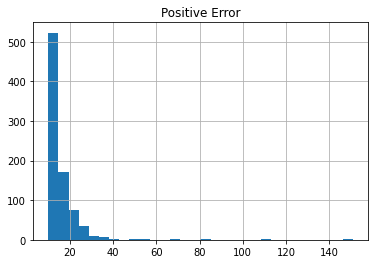

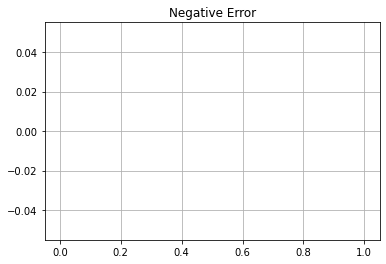

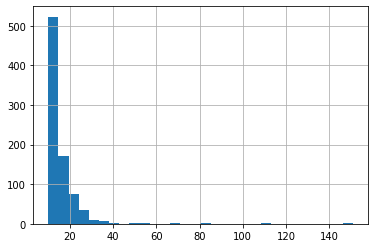

-------------- geo_krs -------------


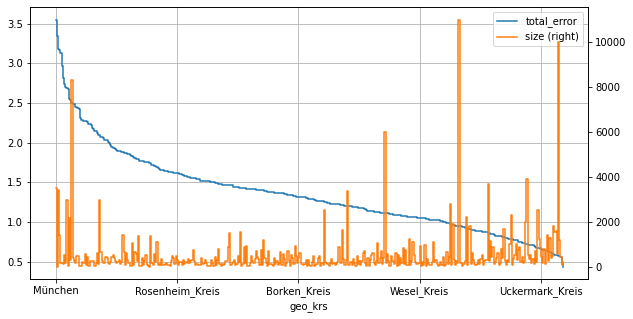

                     total_error  size
geo_krs                               
München                 3.554107  3496
Kronach_Kreis           3.352605    11
Frankfurt_am_Main       3.181779  3420
Stuttgart               3.167118  1407
Nordfriesland_Kreis     3.136875   187
Dachau_Kreis            2.963727   170
Miesbach_Kreis          2.816264   138
München_Kreis           2.734423   509
Rastatt_Kreis           2.699550   192
Hamburg                 2.685356  2993
                        total_error   size
geo_krs                                   
Altenburger_Land_Kreis     0.599660    477
Zwickau_Kreis              0.598765   1841
Plauen                     0.586144   1565
Gera                       0.583476   1596
Mansfeld_Südharz_Kreis     0.576985    567
Chemnitz                   0.571243  10020
Burgenlandkreis            0.568912   1192
Greiz_Kreis                0.560121    445
Kyffhäuserkreis            0.474660     99
Hoyerswerda                0.435739    238
-------------- h

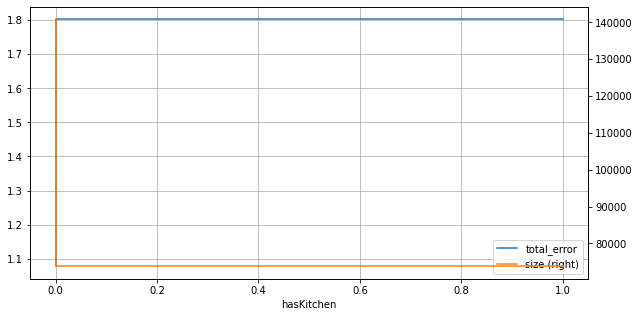

            total_error    size
hasKitchen                     
1              1.802478   73737
0              1.077283  140830
            total_error    size
hasKitchen                     
1              1.802478   73737
0              1.077283  140830
-------------- energyEfficiencyClass -------------
edges [0.0000e+00 3.0000e+00 5.0000e+00 9.9999e+04]
categories 237905    2
143718    2
53329     2
198945    2
193723    0
         ..
119879    2
259178    2
131932    2
146867    2
121958    2
Name: energyEfficiencyClass, Length: 214567, dtype: int64


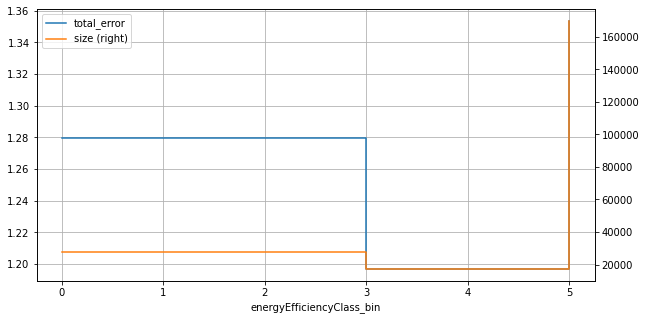

                           total_error    size
energyEfficiencyClass_bin                     
0.0                           1.279844   27613
3.0                           1.196966   17544
5.0                           1.353271  169410
                           total_error    size
energyEfficiencyClass_bin                     
0.0                           1.279844   27613
3.0                           1.196966   17544
5.0                           1.353271  169410
-------------- electricityKwhPrice -------------
edges [1.7050e-01 1.9850e-01 9.9999e+04]
categories 237905    1
143718    0
53329     1
198945    1
193723    1
         ..
119879    1
259178    1
131932    1
146867    0
121958    1
Name: electricityKwhPrice, Length: 214567, dtype: int64


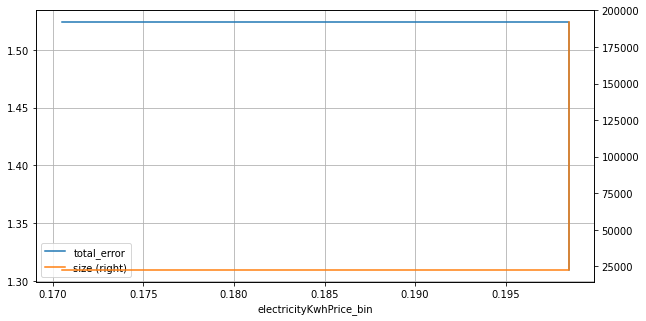

                         total_error    size
electricityKwhPrice_bin                     
0.1705                       1.52380   22822
0.1985                       1.30978  191745
                         total_error    size
electricityKwhPrice_bin                     
0.1705                       1.52380   22822
0.1985                       1.30978  191745
-------------- noRooms -------------
edges [  1.     2.     3.     4.   999.99]
categories 237905    1
143718    1
53329     1
198945    0
193723    0
         ..
119879    0
259178    1
131932    0
146867    2
121958    0
Name: noRooms, Length: 214567, dtype: int64


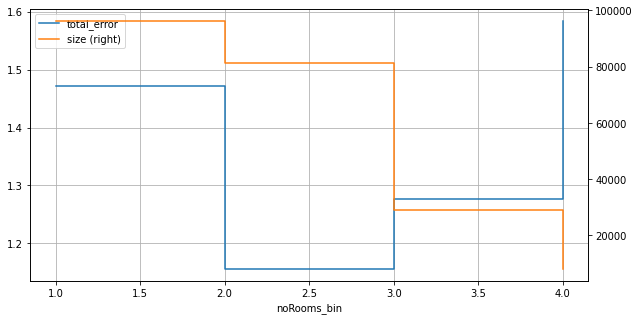

             total_error   size
noRooms_bin                    
1.0             1.472187  96081
2.0             1.156458  81291
3.0             1.275953  29047
4.0             1.583174   8148
             total_error   size
noRooms_bin                    
1.0             1.472187  96081
2.0             1.156458  81291
3.0             1.275953  29047
4.0             1.583174   8148
-------------- petsAllowed -------------


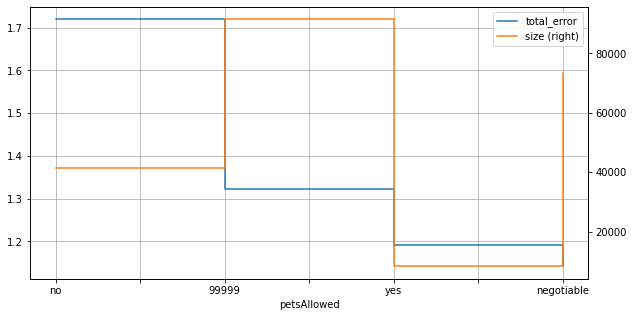

             total_error   size
petsAllowed                    
no              1.719283  41463
99999           1.323672  91418
yes             1.192312   8308
negotiable      1.141611  73378
             total_error   size
petsAllowed                    
no              1.719283  41463
99999           1.323672  91418
yes             1.192312   8308
negotiable      1.141611  73378
-------------- years_last_refurbish -------------
edges [0.000e+00 1.000e+00 4.000e+00 1.004e+03]
categories 237905    0
143718    0
53329     0
198945    2
193723    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: years_last_refurbish, Length: 214567, dtype: int64


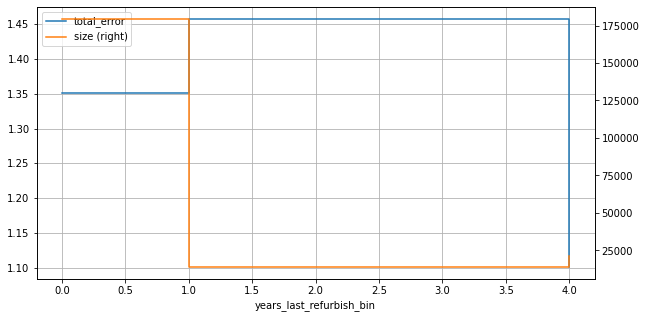

                          total_error    size
years_last_refurbish_bin                     
0.0                          1.350557  179048
1.0                          1.456933   14260
4.0                          1.101554   21259
                          total_error    size
years_last_refurbish_bin                     
0.0                          1.350557  179048
1.0                          1.456933   14260
4.0                          1.101554   21259
-------------- lift -------------


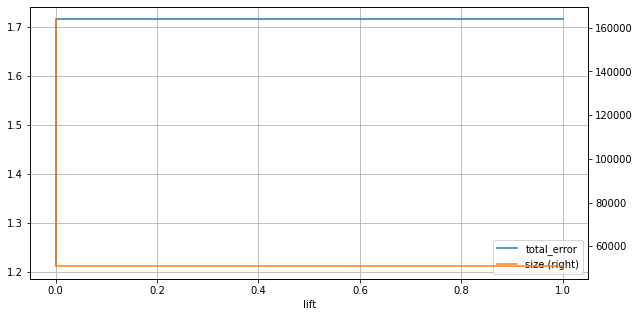

      total_error    size
lift                     
1        1.714573   50749
0        1.211667  163818
      total_error    size
lift                     
1        1.714573   50749
0        1.211667  163818
-------------- garden -------------


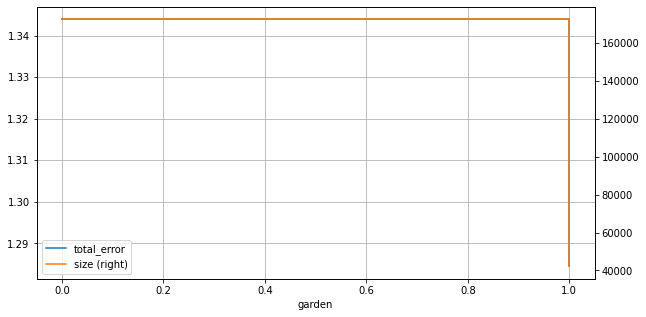

        total_error    size
garden                     
0          1.343885  172469
1          1.284445   42098
        total_error    size
garden                     
0          1.343885  172469
1          1.284445   42098
-------------- years_old -------------
edges [   0.    2.   22.   34.   46.   56.   69.  110. 1018.]
categories 237905    5
143718    3
53329     1
198945    5
193723    2
         ..
119879    6
259178    3
131932    0
146867    0
121958    1
Name: years_old, Length: 214567, dtype: int64


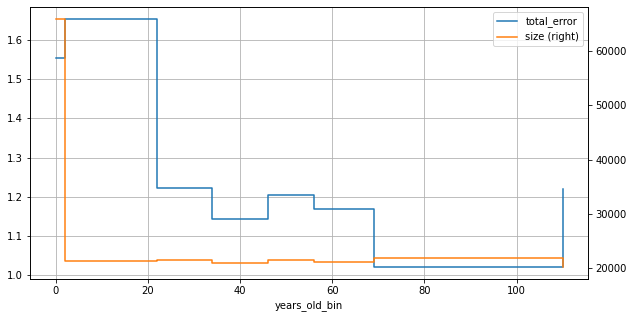

               total_error   size
years_old_bin                    
0.0               1.554393  65836
2.0               1.652470  21342
22.0              1.221602  21561
34.0              1.144371  21012
46.0              1.205048  21477
56.0              1.167733  21206
69.0              1.021895  21846
110.0             1.220678  20287
               total_error   size
years_old_bin                    
0.0               1.554393  65836
2.0               1.652470  21342
22.0              1.221602  21561
34.0              1.144371  21012
46.0              1.205048  21477
56.0              1.167733  21206
69.0              1.021895  21846
110.0             1.220678  20287
-------------- heatingType -------------


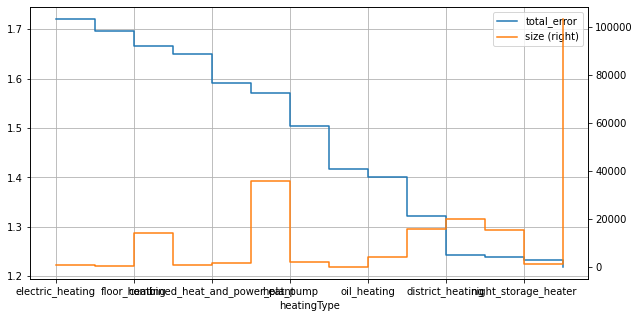

                               total_error   size
heatingType                                      
electric_heating                  1.719673    714
stove_heating                     1.697280    268
floor_heating                     1.666796  14130
wood_pellet_heating               1.650488    782
combined_heat_and_power_plant     1.591400   1548
99999                             1.571564  35716
heat_pump                         1.504361   2165
solar_heating                     1.416233    126
oil_heating                       1.401642   4034
gas_heating                       1.322378  15908
                                total_error    size
heatingType                                        
combined_heat_and_power_plant      1.591400    1548
99999                              1.571564   35716
heat_pump                          1.504361    2165
solar_heating                      1.416233     126
oil_heating                        1.401642    4034
gas_heating                        1

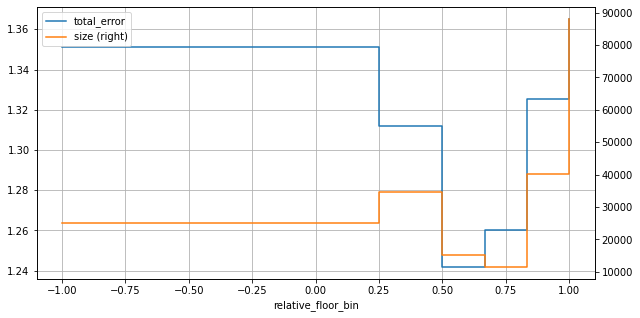

                    total_error   size
relative_floor_bin                    
-1.000000              1.351081  24956
 0.250000              1.311966  34615
 0.500000              1.242033  15305
 0.666667              1.260094  11631
 0.833333              1.325464  40147
 1.000000              1.364896  87913
                    total_error   size
relative_floor_bin                    
-1.000000              1.351081  24956
 0.250000              1.311966  34615
 0.500000              1.242033  15305
 0.666667              1.260094  11631
 0.833333              1.325464  40147
 1.000000              1.364896  87913
-------------- serviceCharge -------------
edges [0.0000e+00 6.6000e+01 8.6000e+01 1.0000e+02 1.2000e+02 1.4000e+02
 1.5000e+02 1.8000e+02 2.0500e+02 2.7000e+02 9.9999e+04]
categories 237905    2
143718    9
53329     5
198945    2
193723    2
         ..
119879    4
259178    8
131932    1
146867    8
121958    8
Name: serviceCharge, Length: 214567, dtype: int64


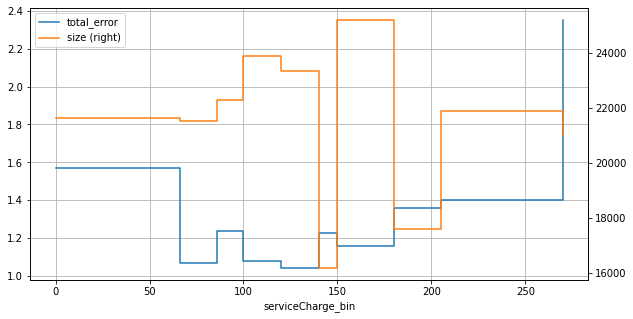

                   total_error   size
serviceCharge_bin                    
0.0                   1.568551  21643
66.0                  1.067456  21521
86.0                  1.236782  22295
100.0                 1.077317  23907
120.0                 1.044098  23352
140.0                 1.228774  16181
150.0                 1.158739  25187
180.0                 1.357179  17577
205.0                 1.399927  21903
270.0                 2.349534  21001
                   total_error   size
serviceCharge_bin                    
0.0                   1.568551  21643
66.0                  1.067456  21521
86.0                  1.236782  22295
100.0                 1.077317  23907
120.0                 1.044098  23352
140.0                 1.228774  16181
150.0                 1.158739  25187
180.0                 1.357179  17577
205.0                 1.399927  21903
270.0                 2.349534  21001
-------------- condition -------------


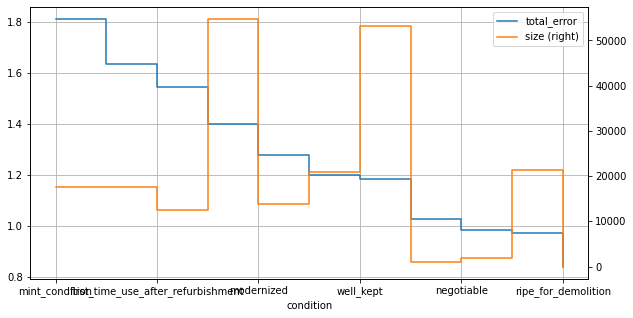

                                    total_error   size
condition                                             
mint_condition                         1.811345  17645
first_time_use                         1.634666  17496
first_time_use_after_refurbishment     1.545486  12466
99999                                  1.402482  54654
modernized                             1.280317  13784
fully_renovated                        1.201718  20978
well_kept                              1.185915  53184
need_of_renovation                     1.027307   1101
negotiable                             0.983149   1802
refurbished                            0.972669  21454
                                    total_error   size
condition                                             
first_time_use                         1.634666  17496
first_time_use_after_refurbishment     1.545486  12466
99999                                  1.402482  54654
modernized                             1.280317  13784
fully_reno

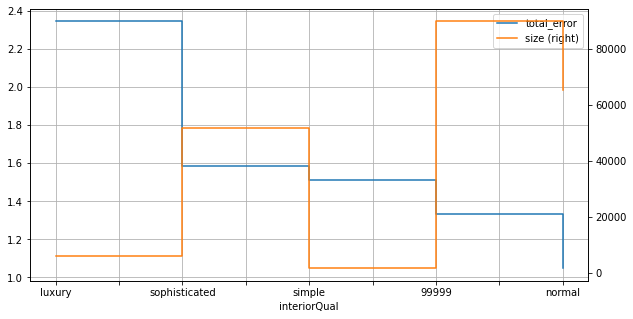

               total_error   size
interiorQual                     
luxury            2.343990   6129
sophisticated     1.583722  51654
simple            1.511337   1600
99999             1.330481  89823
normal            1.045629  65361
               total_error   size
interiorQual                     
luxury            2.343990   6129
sophisticated     1.583722  51654
simple            1.511337   1600
99999             1.330481  89823
normal            1.045629  65361
-------------- electricityBasePrice -------------
edges [7.1430e+01 9.0760e+01 9.9999e+04]
categories 237905    1
143718    0
53329     1
198945    1
193723    1
         ..
119879    1
259178    1
131932    1
146867    0
121958    1
Name: electricityBasePrice, Length: 214567, dtype: int64


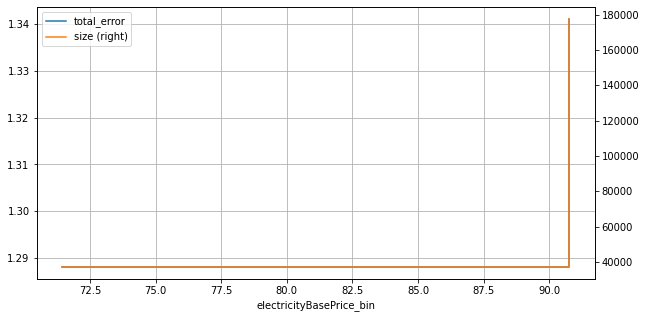

                          total_error    size
electricityBasePrice_bin                     
71.43                        1.288179   37362
90.76                        1.341001  177205
                          total_error    size
electricityBasePrice_bin                     
71.43                        1.288179   37362
90.76                        1.341001  177205
-------------- streetPlain -------------


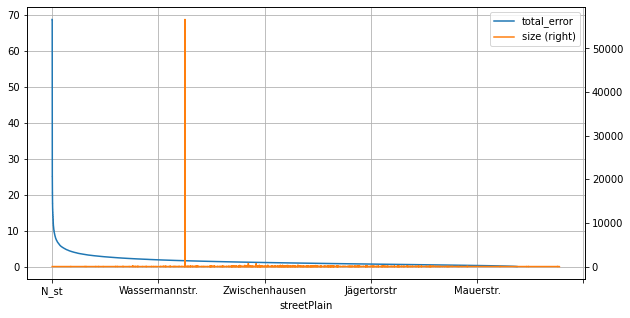

                       total_error  size
streetPlain                             
N_st                     68.859766     1
Rückertstr._             52.329764     1
Birkenauer_Straße        42.197051     2
Mittermayerstr           37.170022     1
Dietlindenstr            31.260781     1
Am_Heidehaus             29.373833     1
Wandsbeker_Zollstraße    28.590924     1
Stetterweg               28.313155     1
Am_Moosfeld              27.370357     1
Marbacherstrasse         27.059477     1
                            total_error  size
streetPlain                                  
Äußere_Zeulenrodaer_Straße          NaN     1
Ölhafendamm                         NaN     1
Österkoppel                         NaN     2
Österreicherstr.                    NaN     1
Öttinger_Str.                       NaN     1
Über_dem_Wechsel                    NaN     2
Über_der_Lehmkuhle                  NaN     1
Überruhrstraße                      NaN     2
Ückelhofer_Straße                   NaN     3
Ük

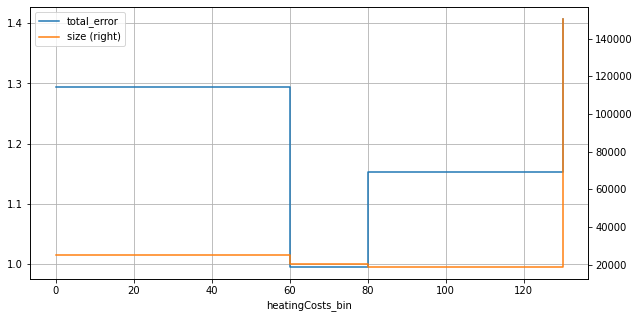

                  total_error    size
heatingCosts_bin                     
0.0                  1.294020   25321
60.0                 0.996423   20118
80.0                 1.152737   18979
130.0                1.406195  150149
                  total_error    size
heatingCosts_bin                     
0.0                  1.294020   25321
60.0                 0.996423   20118
80.0                 1.152737   18979
130.0                1.406195  150149
-------------- livingSpace -------------
edges [1.0000e+00 4.0950e+01 5.0030e+01 5.7000e+01 6.1850e+01 6.7340e+01
 7.4000e+01 8.1800e+01 9.3000e+01 1.1285e+02 6.6100e+04]
categories 237905    2
143718    9
53329     7
198945    5
193723    0
         ..
119879    4
259178    6
131932    0
146867    8
121958    5
Name: livingSpace, Length: 214567, dtype: int64


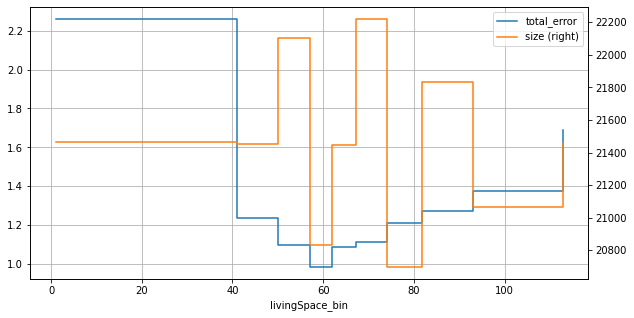

                 total_error   size
livingSpace_bin                    
1.00                2.257439  21463
40.95               1.237087  21455
50.03               1.098634  22103
57.00               0.988126  20830
61.85               1.088661  21445
67.34               1.112416  22218
74.00               1.212083  20699
81.80               1.275030  21834
93.00               1.376476  21064
112.85              1.687524  21456
                 total_error   size
livingSpace_bin                    
1.00                2.257439  21463
40.95               1.237087  21455
50.03               1.098634  22103
57.00               0.988126  20830
61.85               1.088661  21445
67.34               1.112416  22218
74.00               1.212083  20699
81.80               1.275030  21834
93.00               1.376476  21064
112.85              1.687524  21456
-------------- telekomHybridUploadSpeed -------------
edges [1.0000e+01 9.9999e+04]
categories 237905    0
143718    0
53329     0
19894

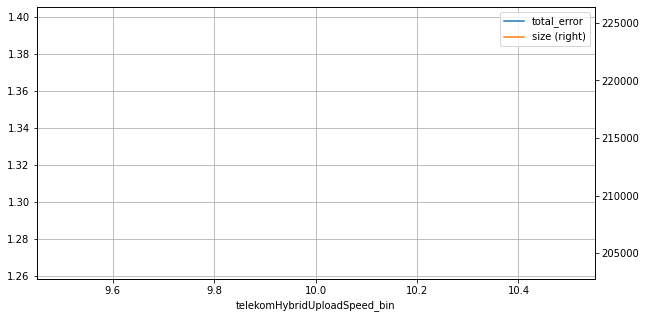

                              total_error    size
telekomHybridUploadSpeed_bin                     
10.0                             1.331869  214567
                              total_error    size
telekomHybridUploadSpeed_bin                     
10.0                             1.331869  214567
-------------- typeOfFlat -------------


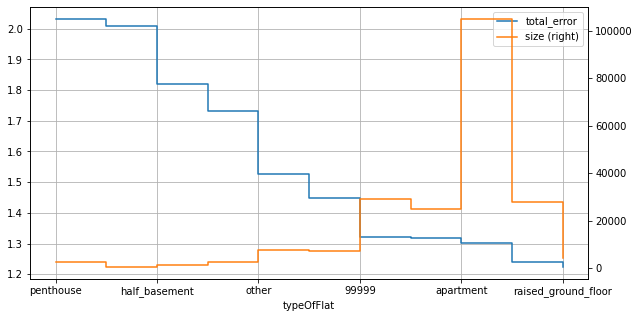

               total_error    size
typeOfFlat                        
penthouse         2.030400    2843
loft              2.010252     769
half_basement     1.818447    1604
terraced_flat     1.731529    2731
other             1.526355    7634
maisonette        1.447810    7466
99999             1.321309   29222
ground_floor      1.318682   25127
apartment         1.303265  104805
roof_storey       1.239726   27874
                     total_error    size
typeOfFlat                              
loft                    2.010252     769
half_basement           1.818447    1604
terraced_flat           1.731529    2731
other                   1.526355    7634
maisonette              1.447810    7466
99999                   1.321309   29222
ground_floor            1.318682   25127
apartment               1.303265  104805
roof_storey             1.239726   27874
raised_ground_floor     1.224940    4492
-------------- noParkSpaces -------------
edges [0.0000e+00 1.0000e+00 9.9999e+04]
categ

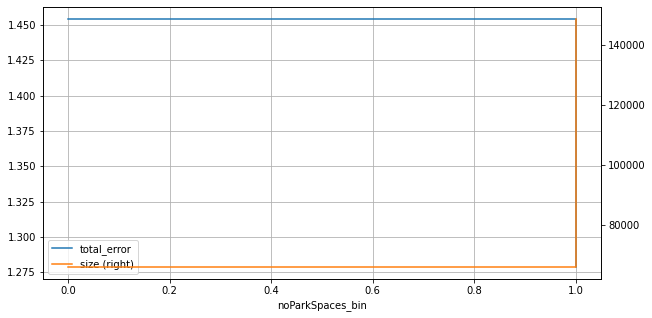

                  total_error    size
noParkSpaces_bin                     
0.0                  1.453823   65947
1.0                  1.279022  148620
                  total_error    size
noParkSpaces_bin                     
0.0                  1.453823   65947
1.0                  1.279022  148620
-------------- newlyConst -------------


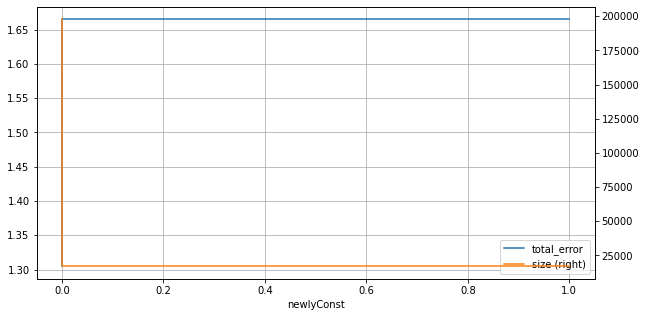

            total_error    size
newlyConst                     
1              1.665023   16854
0              1.304491  197713
            total_error    size
newlyConst                     
1              1.665023   16854
0              1.304491  197713
-------------- balcony -------------


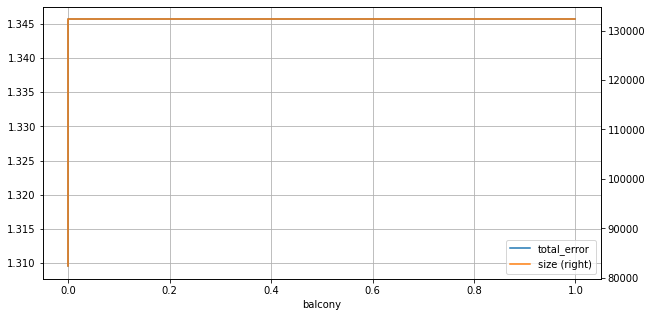

         total_error    size
balcony                     
1           1.345687  132259
0           1.309473   82308
         total_error    size
balcony                     
1           1.345687  132259
0           1.309473   82308
-------------- floor -------------
edges [-1.0000e+00  1.0000e+00  2.0000e+00  3.0000e+00  4.0000e+00  7.0000e+00
  9.9999e+04]
categories 237905    5
143718    0
53329     0
198945    0
193723    0
         ..
119879    5
259178    5
131932    1
146867    1
121958    5
Name: floor, Length: 214567, dtype: int64


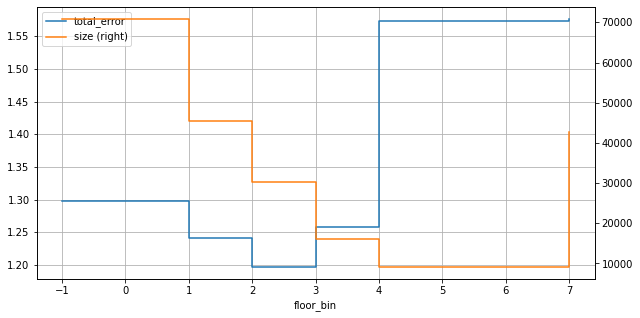

           total_error   size
floor_bin                    
-1.0          1.298544  70730
 1.0          1.240774  45487
 2.0          1.197551  30387
 3.0          1.258452  15972
 4.0          1.573505   9222
 7.0          1.575809  42769
           total_error   size
floor_bin                    
-1.0          1.298544  70730
 1.0          1.240774  45487
 2.0          1.197551  30387
 3.0          1.258452  15972
 4.0          1.573505   9222
 7.0          1.575809  42769
-------------- telekomUploadSpeed -------------
edges [1.0000e+00 2.4000e+00 1.0000e+01 4.0000e+01 9.9999e+04]
categories 237905    2
143718    2
53329     3
198945    3
193723    2
         ..
119879    2
259178    1
131932    3
146867    3
121958    2
Name: telekomUploadSpeed, Length: 214567, dtype: int64


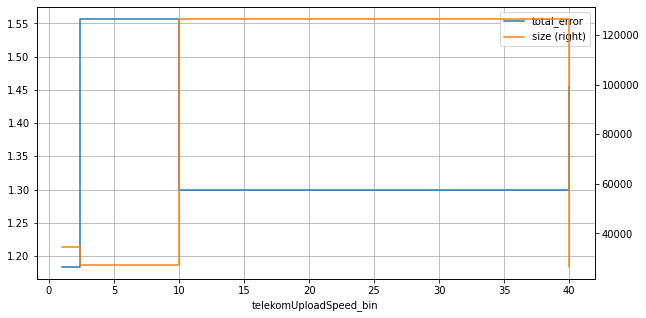

                        total_error    size
telekomUploadSpeed_bin                     
1.0                        1.184048   34354
2.4                        1.556065   27226
10.0                       1.298552  126351
40.0                       1.454180   26636
                        total_error    size
telekomUploadSpeed_bin                     
1.0                        1.184048   34354
2.4                        1.556065   27226
10.0                       1.298552  126351
40.0                       1.454180   26636
-------------- geo_bln -------------


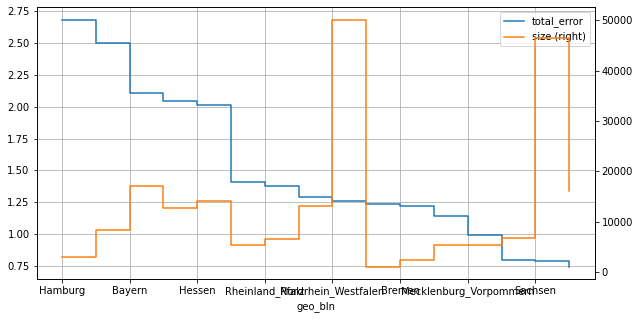

                     total_error   size
geo_bln                                
Hamburg                 2.685356   2993
Berlin                  2.502078   8319
Bayern                  2.106315  17210
Baden_Württemberg       2.046329  12816
Hessen                  2.011029  14224
Schleswig_Holstein      1.407136   5341
Rheinland_Pfalz         1.374299   6706
Niedersachsen           1.293870  13221
Nordrhein_Westfalen     1.262044  50102
Saarland                1.232866   1150
                        total_error   size
geo_bln                                   
Rheinland_Pfalz            1.374299   6706
Niedersachsen              1.293870  13221
Nordrhein_Westfalen        1.262044  50102
Saarland                   1.232866   1150
Bremen                     1.220300   2370
Brandenburg                1.138172   5512
Mecklenburg_Vorpommern     0.989303   5341
Thüringen                  0.795114   6736
Sachsen                    0.787293  46418
Sachsen_Anhalt             0.743464  16108
----

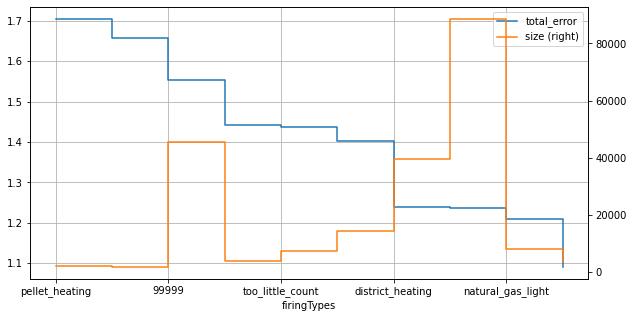

                   total_error   size
firingTypes                          
pellet_heating        1.703718   1968
geothermal            1.657865   1940
99999                 1.554105  45490
electricity           1.443435   3876
too_little_count      1.436744   7374
oil                   1.403248  14481
district_heating      1.239778  39405
gas                   1.237513  88383
natural_gas_light     1.208675   8015
natural_gas_heavy     1.091862   3635
                   total_error   size
firingTypes                          
pellet_heating        1.703718   1968
geothermal            1.657865   1940
99999                 1.554105  45490
electricity           1.443435   3876
too_little_count      1.436744   7374
oil                   1.403248  14481
district_heating      1.239778  39405
gas                   1.237513  88383
natural_gas_light     1.208675   8015
natural_gas_heavy     1.091862   3635
-------------- floor_lift -------------
edges [-9.9900e+02 -3.0000e+00 -2.0000e+00 -1.00

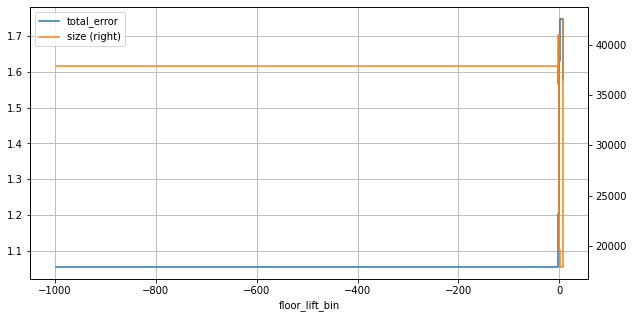

                total_error   size
floor_lift_bin                    
-999.0             1.057339  37877
-3.0               1.138039  36129
-2.0               1.203819  41008
-1.0               1.325055  19540
 0.0               1.629633  19540
 2.0               1.745181  17918
 7.0               1.577235  42555
                total_error   size
floor_lift_bin                    
-999.0             1.057339  37877
-3.0               1.138039  36129
-2.0               1.203819  41008
-1.0               1.325055  19540
 0.0               1.629633  19540
 2.0               1.745181  17918
 7.0               1.577235  42555
-------------- cellar -------------


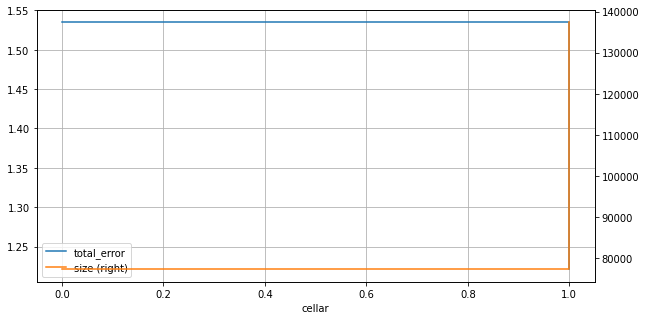

        total_error    size
cellar                     
0          1.534730   77199
1          1.220877  137368
        total_error    size
cellar                     
0          1.534730   77199
1          1.220877  137368
-------------- numberOfFloors -------------
edges [0.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00 6.0000e+00 9.9999e+04]
categories 237905    4
143718    4
53329     0
198945    3
193723    3
         ..
119879    0
259178    4
131932    4
146867    1
121958    4
Name: numberOfFloors, Length: 214567, dtype: int64


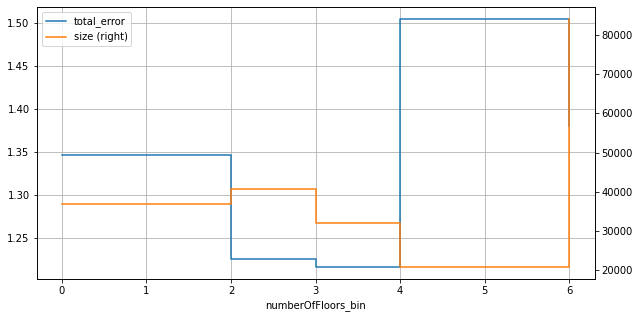

                    total_error   size
numberOfFloors_bin                    
0.0                    1.346350  36985
2.0                    1.226220  40713
3.0                    1.217037  32027
4.0                    1.503626  20978
6.0                    1.380393  83864
                    total_error   size
numberOfFloors_bin                    
0.0                    1.346350  36985
2.0                    1.226220  40713
3.0                    1.217037  32027
4.0                    1.503626  20978
6.0                    1.380393  83864
-------------- telekomTvOffer -------------


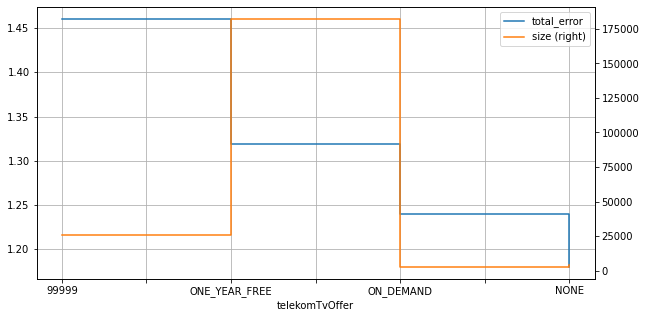

                total_error    size
telekomTvOffer                     
99999              1.459688   25938
ONE_YEAR_FREE      1.318506  181826
ON_DEMAND          1.239421    2918
NONE               1.180454    3885
                total_error    size
telekomTvOffer                     
99999              1.459688   25938
ONE_YEAR_FREE      1.318506  181826
ON_DEMAND          1.239421    2918
NONE               1.180454    3885


In [10]:
data_modelled, samples_error = features_mod_pipeline(data_train = data_train,
                                                        data_train_transformed = data_train_transformed,
                                                        features_1 = features_0,
                                                        features_2 = features_0,
                                                        plot_error_features = True, #Now I plot the errors
                                                        threshold = 10,
                                                        cat_features = True)

It seems that for some features (see for example geo_krs feature) the error where we have less data points is higher than the error in Kreise in which we have more. This makes a lot of sense! And we are not giving the oportunity to the model to 'see' this characteristic. Maybe we can add some features that account for this like the counts of each group.

#### Add value count features

TOTAL ERROR: 1.3166835860128667
ERROR_1: 1.127915085865638
ERROR_2: 0.18877194219425786


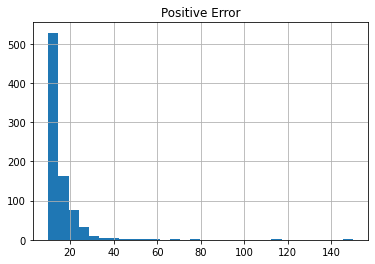

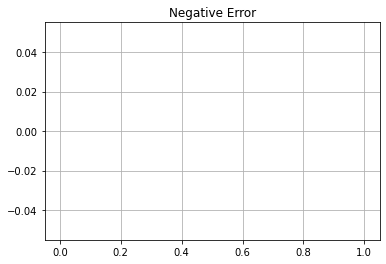

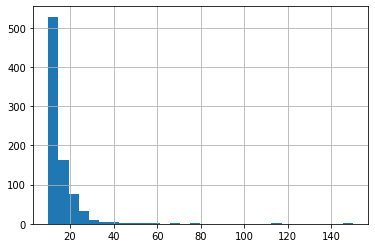

-------------- energyEfficiencyClass -------------
edges [0.0000e+00 3.0000e+00 5.0000e+00 9.9999e+04]
categories 237905    2
143718    2
53329     2
198945    2
193723    0
         ..
119879    2
259178    2
131932    2
146867    2
121958    2
Name: energyEfficiencyClass, Length: 214567, dtype: int64


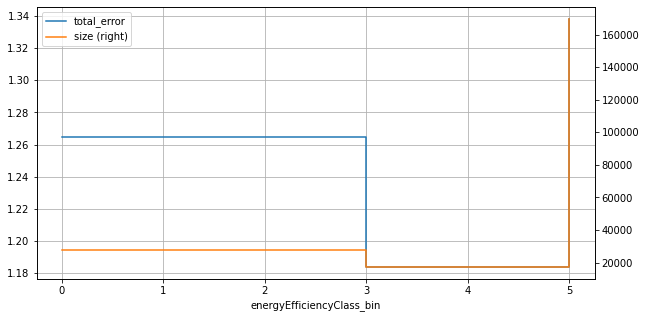

                           total_error    size
energyEfficiencyClass_bin                     
0.0                           1.264678   27613
3.0                           1.184152   17544
5.0                           1.337850  169410
                           total_error    size
energyEfficiencyClass_bin                     
0.0                           1.264678   27613
3.0                           1.184152   17544
5.0                           1.337850  169410
-------------- electricityKwhPrice -------------
edges [1.7050e-01 1.9850e-01 9.9999e+04]
categories 237905    1
143718    0
53329     1
198945    1
193723    1
         ..
119879    1
259178    1
131932    1
146867    0
121958    1
Name: electricityKwhPrice, Length: 214567, dtype: int64


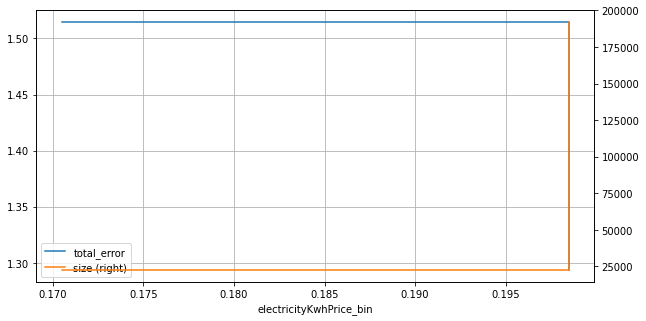

                         total_error    size
electricityKwhPrice_bin                     
0.1705                      1.514260   22822
0.1985                      1.293944  191745
                         total_error    size
electricityKwhPrice_bin                     
0.1705                      1.514260   22822
0.1985                      1.293944  191745
-------------- noRooms -------------
edges [  1.     2.     3.     4.   999.99]
categories 237905    1
143718    1
53329     1
198945    0
193723    0
         ..
119879    0
259178    1
131932    0
146867    2
121958    0
Name: noRooms, Length: 214567, dtype: int64


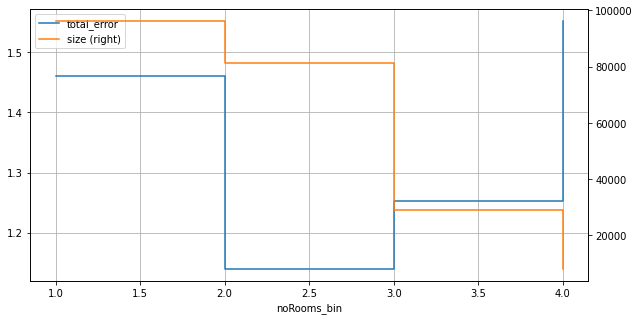

             total_error   size
noRooms_bin                    
1.0             1.461518  96081
2.0             1.140288  81291
3.0             1.252593  29047
4.0             1.551482   8148
             total_error   size
noRooms_bin                    
1.0             1.461518  96081
2.0             1.140288  81291
3.0             1.252593  29047
4.0             1.551482   8148
-------------- geo_bln_baseRent_size -------------
edges [ 1150.  5512.  8319. 13221. 16108. 17210. 46418. 50102.]
categories 237905    6
143718    0
53329     0
198945    6
193723    0
         ..
119879    6
259178    6
131932    1
146867    0
121958    6
Name: geo_bln_baseRent_size, Length: 214567, dtype: int64


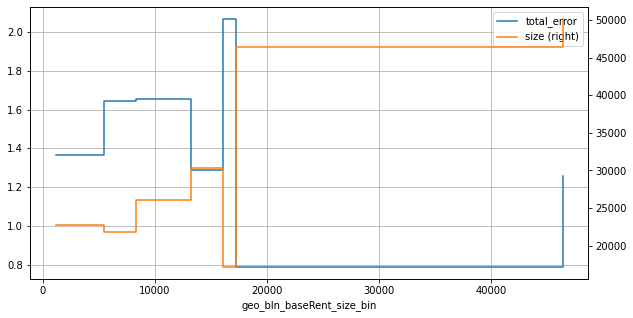

                           total_error   size
geo_bln_baseRent_size_bin                    
1150.0                        1.366253  22707
5512.0                        1.642299  21761
8319.0                        1.652756  26037
13221.0                       1.286883  30332
16108.0                       2.065635  17210
17210.0                       0.790076  46418
46418.0                       1.257556  50102
                           total_error   size
geo_bln_baseRent_size_bin                    
1150.0                        1.366253  22707
5512.0                        1.642299  21761
8319.0                        1.652756  26037
13221.0                       1.286883  30332
16108.0                       2.065635  17210
17210.0                       0.790076  46418
46418.0                       1.257556  50102
-------------- years_last_refurbish -------------
edges [0.000e+00 1.000e+00 4.000e+00 1.004e+03]
categories 237905    0
143718    0
53329     0
198945    2
193723    0
   

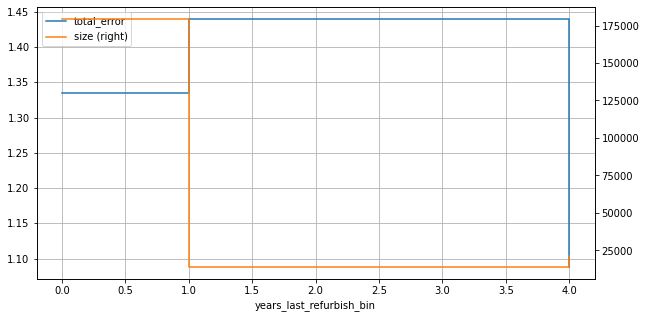

                          total_error    size
years_last_refurbish_bin                     
0.0                          1.335307  179048
1.0                          1.439041   14260
4.0                          1.088706   21259
                          total_error    size
years_last_refurbish_bin                     
0.0                          1.335307  179048
1.0                          1.439041   14260
4.0                          1.088706   21259
-------------- years_old -------------
edges [   0.    2.   22.   34.   46.   56.   69.  110. 1018.]
categories 237905    5
143718    3
53329     1
198945    5
193723    2
         ..
119879    6
259178    3
131932    0
146867    0
121958    1
Name: years_old, Length: 214567, dtype: int64


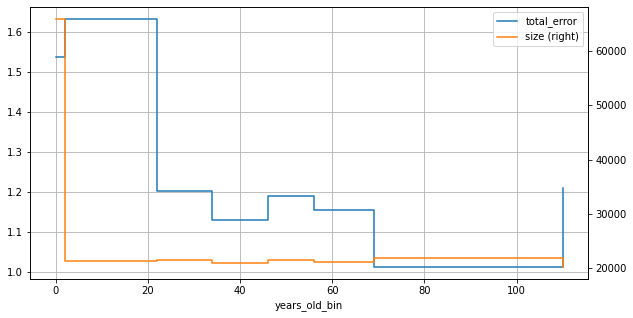

               total_error   size
years_old_bin                    
0.0               1.537770  65836
2.0               1.630234  21342
22.0              1.203214  21561
34.0              1.129710  21012
46.0              1.190030  21477
56.0              1.154184  21206
69.0              1.014278  21846
110.0             1.210139  20287
               total_error   size
years_old_bin                    
0.0               1.537770  65836
2.0               1.630234  21342
22.0              1.203214  21561
34.0              1.129710  21012
46.0              1.190030  21477
56.0              1.154184  21206
69.0              1.014278  21846
110.0             1.210139  20287
-------------- garden_baseRent_size -------------
edges [ 42098. 172469.]
categories 237905    0
143718    0
53329     0
198945    0
193723    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: garden_baseRent_size, Length: 214567, dtype: int64


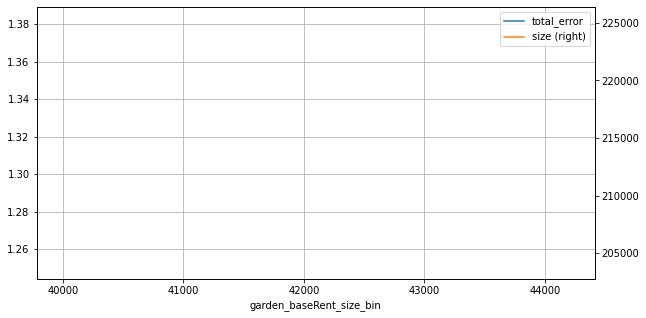

                          total_error    size
garden_baseRent_size_bin                     
42098.0                      1.316684  214567
                          total_error    size
garden_baseRent_size_bin                     
42098.0                      1.316684  214567
-------------- heatingType -------------


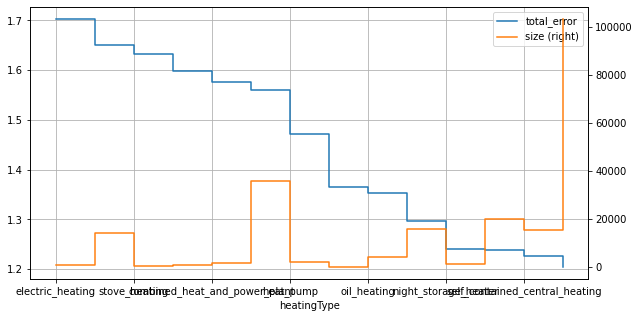

                               total_error   size
heatingType                                      
electric_heating                  1.701909    714
floor_heating                     1.650091  14130
stove_heating                     1.632128    268
wood_pellet_heating               1.597342    782
combined_heat_and_power_plant     1.576481   1548
99999                             1.559158  35716
heat_pump                         1.471948   2165
solar_heating                     1.364930    126
oil_heating                       1.353335   4034
gas_heating                       1.297100  15908
                                total_error    size
heatingType                                        
combined_heat_and_power_plant      1.576481    1548
99999                              1.559158   35716
heat_pump                          1.471948    2165
solar_heating                      1.364930     126
oil_heating                        1.353335    4034
gas_heating                        1

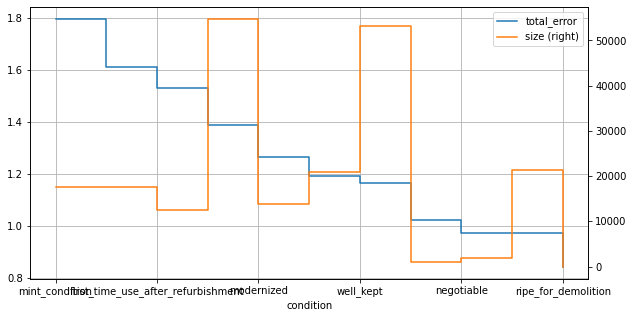

                                    total_error   size
condition                                             
mint_condition                         1.793717  17645
first_time_use                         1.612227  17496
first_time_use_after_refurbishment     1.528560  12466
99999                                  1.388418  54654
modernized                             1.262430  13784
fully_renovated                        1.189658  20978
well_kept                              1.165543  53184
need_of_renovation                     1.019994   1101
negotiable                             0.973510   1802
refurbished                            0.972884  21454
                                    total_error   size
condition                                             
first_time_use                         1.612227  17496
first_time_use_after_refurbishment     1.528560  12466
99999                                  1.388418  54654
modernized                             1.262430  13784
fully_reno

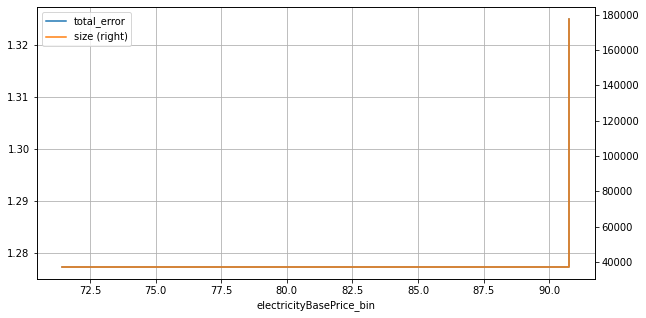

                          total_error    size
electricityBasePrice_bin                     
71.43                        1.277353   37362
90.76                        1.324904  177205
                          total_error    size
electricityBasePrice_bin                     
71.43                        1.277353   37362
90.76                        1.324904  177205
-------------- heatingCosts -------------
edges [0.0000e+00 6.0000e+01 8.0000e+01 1.3000e+02 9.9999e+04]
categories 237905    0
143718    3
53329     1
198945    3
193723    3
         ..
119879    2
259178    3
131932    3
146867    3
121958    3
Name: heatingCosts, Length: 214567, dtype: int64


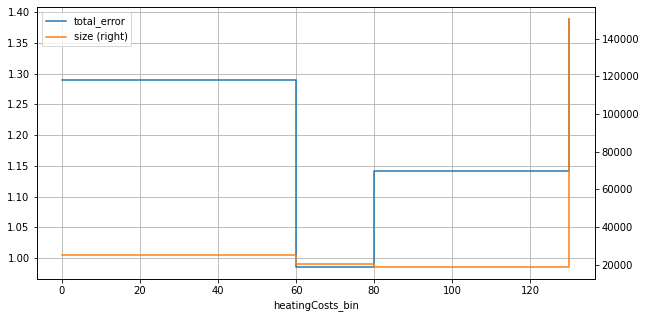

                  total_error    size
heatingCosts_bin                     
0.0                  1.289092   25321
60.0                 0.986354   20118
80.0                 1.142407   18979
130.0                1.387948  150149
                  total_error    size
heatingCosts_bin                     
0.0                  1.289092   25321
60.0                 0.986354   20118
80.0                 1.142407   18979
130.0                1.387948  150149
-------------- telekomHybridUploadSpeed -------------
edges [1.0000e+01 9.9999e+04]
categories 237905    0
143718    0
53329     0
198945    0
193723    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: telekomHybridUploadSpeed, Length: 214567, dtype: int64


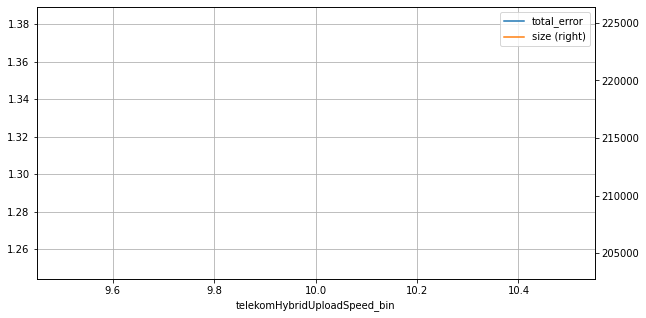

                              total_error    size
telekomHybridUploadSpeed_bin                     
10.0                             1.316684  214567
                              total_error    size
telekomHybridUploadSpeed_bin                     
10.0                             1.316684  214567
-------------- typeOfFlat -------------


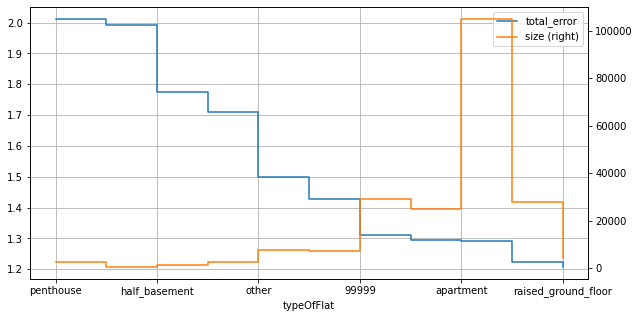

               total_error    size
typeOfFlat                        
penthouse         2.010191    2843
loft              1.990638     769
half_basement     1.773698    1604
terraced_flat     1.711693    2731
other             1.500117    7634
maisonette        1.428702    7466
99999             1.312167   29222
ground_floor      1.296226   25127
apartment         1.290330  104805
roof_storey       1.223705   27874
                     total_error    size
typeOfFlat                              
loft                    1.990638     769
half_basement           1.773698    1604
terraced_flat           1.711693    2731
other                   1.500117    7634
maisonette              1.428702    7466
99999                   1.312167   29222
ground_floor            1.296226   25127
apartment               1.290330  104805
roof_storey             1.223705   27874
raised_ground_floor     1.209037    4492
-------------- noParkSpaces -------------
edges [0.0000e+00 1.0000e+00 9.9999e+04]
categ

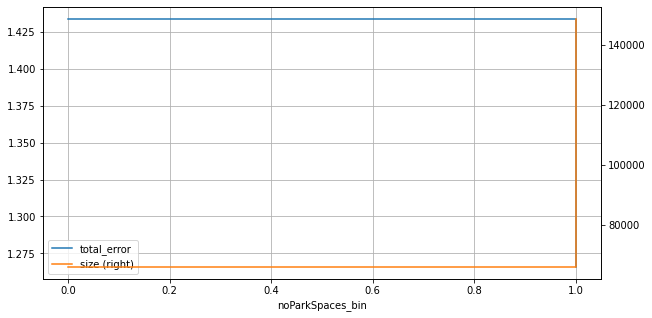

                  total_error    size
noParkSpaces_bin                     
0.0                  1.433300   65947
1.0                  1.266149  148620
                  total_error    size
noParkSpaces_bin                     
0.0                  1.433300   65947
1.0                  1.266149  148620
-------------- balcony -------------


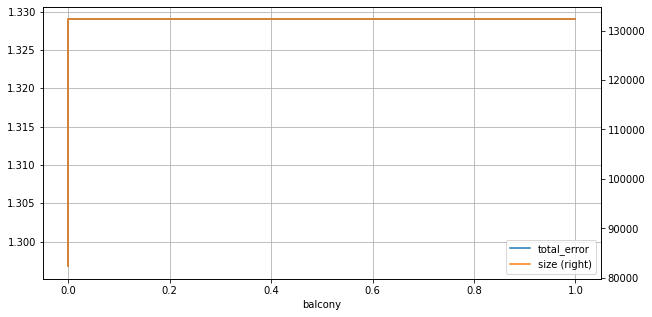

         total_error    size
balcony                     
1           1.328981  132259
0           1.296751   82308
         total_error    size
balcony                     
1           1.328981  132259
0           1.296751   82308
-------------- floor -------------
edges [-1.0000e+00  1.0000e+00  2.0000e+00  3.0000e+00  4.0000e+00  7.0000e+00
  9.9999e+04]
categories 237905    5
143718    0
53329     0
198945    0
193723    0
         ..
119879    5
259178    5
131932    1
146867    1
121958    5
Name: floor, Length: 214567, dtype: int64


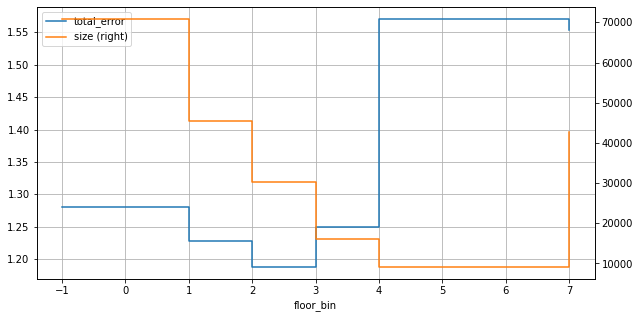

           total_error   size
floor_bin                    
-1.0          1.279835  70730
 1.0          1.228229  45487
 2.0          1.188450  30387
 3.0          1.250118  15972
 4.0          1.569911   9222
 7.0          1.553547  42769
           total_error   size
floor_bin                    
-1.0          1.279835  70730
 1.0          1.228229  45487
 2.0          1.188450  30387
 3.0          1.250118  15972
 4.0          1.569911   9222
 7.0          1.553547  42769
-------------- telekomUploadSpeed -------------
edges [1.0000e+00 2.4000e+00 1.0000e+01 4.0000e+01 9.9999e+04]
categories 237905    2
143718    2
53329     3
198945    3
193723    2
         ..
119879    2
259178    1
131932    3
146867    3
121958    2
Name: telekomUploadSpeed, Length: 214567, dtype: int64


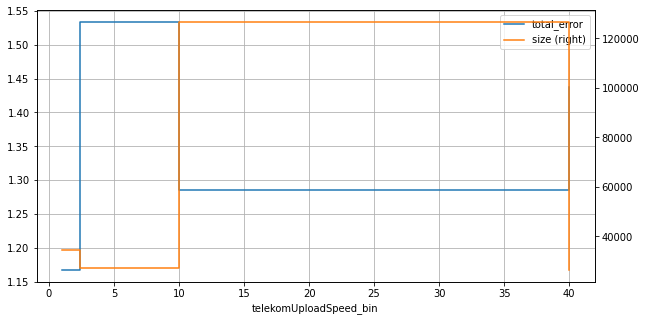

                        total_error    size
telekomUploadSpeed_bin                     
1.0                        1.167844   34354
2.4                        1.532802   27226
10.0                       1.285557  126351
40.0                       1.437999   26636
                        total_error    size
telekomUploadSpeed_bin                     
1.0                        1.167844   34354
2.4                        1.532802   27226
10.0                       1.285557  126351
40.0                       1.437999   26636
-------------- geo_plz_baseRent_size -------------
edges [1.000e+00 1.600e+01 3.300e+01 4.900e+01 6.500e+01 8.700e+01 1.130e+02
 1.600e+02 2.600e+02 4.850e+02 1.601e+03]
categories 237905    6
143718    2
53329     3
198945    7
193723    6
         ..
119879    6
259178    1
131932    7
146867    7
121958    4
Name: geo_plz_baseRent_size, Length: 214567, dtype: int64


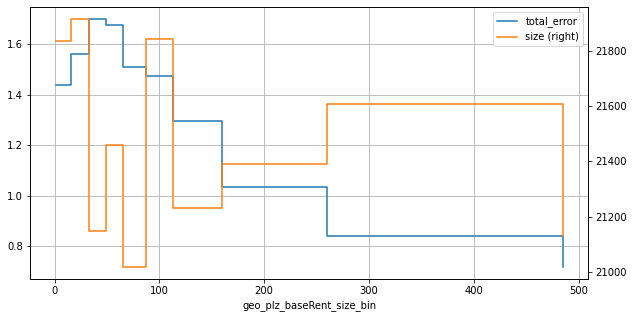

                           total_error   size
geo_plz_baseRent_size_bin                    
1.0                           1.437711  21834
16.0                          1.559215  21913
33.0                          1.697490  21146
49.0                          1.677355  21460
65.0                          1.510597  21019
87.0                          1.473198  21841
113.0                         1.296969  21229
160.0                         1.032405  21390
260.0                         0.838610  21607
485.0                         0.719516  21128
                           total_error   size
geo_plz_baseRent_size_bin                    
1.0                           1.437711  21834
16.0                          1.559215  21913
33.0                          1.697490  21146
49.0                          1.677355  21460
65.0                          1.510597  21019
87.0                          1.473198  21841
113.0                         1.296969  21229
160.0                         1.03

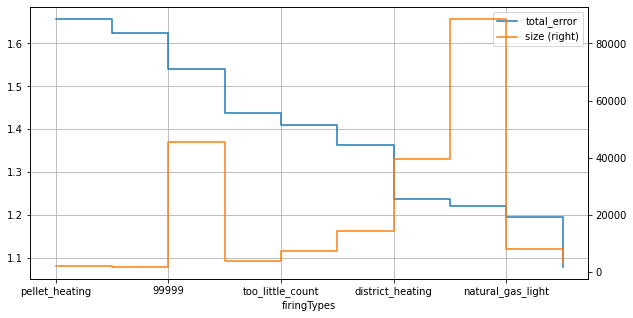

                   total_error   size
firingTypes                          
pellet_heating        1.655898   1968
geothermal            1.625007   1940
99999                 1.540069  45490
electricity           1.439053   3876
too_little_count      1.411311   7374
oil                   1.362655  14481
district_heating      1.237432  39405
gas                   1.221171  88383
natural_gas_light     1.196504   8015
natural_gas_heavy     1.080760   3635
                   total_error   size
firingTypes                          
pellet_heating        1.655898   1968
geothermal            1.625007   1940
99999                 1.540069  45490
electricity           1.439053   3876
too_little_count      1.411311   7374
oil                   1.362655  14481
district_heating      1.237432  39405
gas                   1.221171  88383
natural_gas_light     1.196504   8015
natural_gas_heavy     1.080760   3635
-------------- floor_lift -------------
edges [-9.9900e+02 -3.0000e+00 -2.0000e+00 -1.00

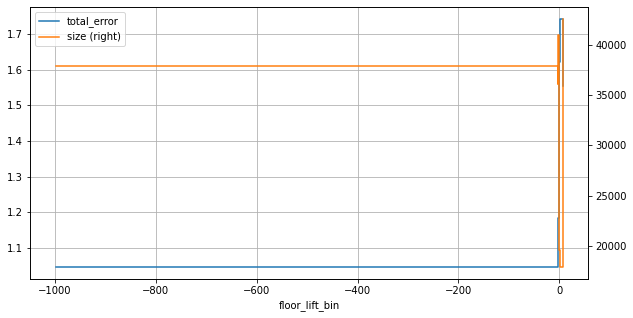

                total_error   size
floor_lift_bin                    
-999.0             1.047602  37877
-3.0               1.123993  36129
-2.0               1.183508  41008
-1.0               1.305159  19540
 0.0               1.621136  19540
 2.0               1.741170  17918
 7.0               1.554798  42555
                total_error   size
floor_lift_bin                    
-999.0             1.047602  37877
-3.0               1.123993  36129
-2.0               1.183508  41008
-1.0               1.305159  19540
 0.0               1.621136  19540
 2.0               1.741170  17918
 7.0               1.554798  42555
-------------- cellar -------------


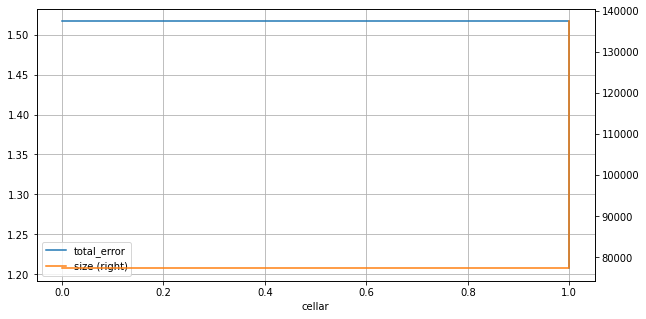

        total_error    size
cellar                     
0          1.516758   77199
1          1.207215  137368
        total_error    size
cellar                     
0          1.516758   77199
1          1.207215  137368
-------------- numberOfFloors -------------
edges [0.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00 6.0000e+00 9.9999e+04]
categories 237905    4
143718    4
53329     0
198945    3
193723    3
         ..
119879    0
259178    4
131932    4
146867    1
121958    4
Name: numberOfFloors, Length: 214567, dtype: int64


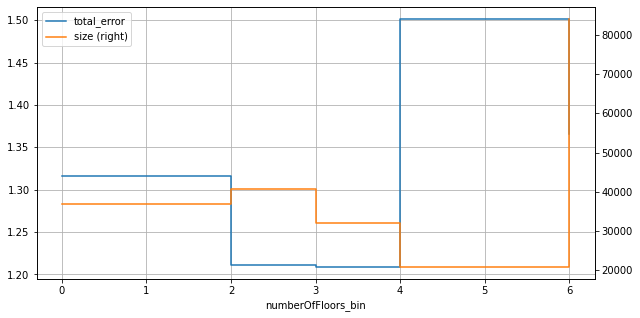

                    total_error   size
numberOfFloors_bin                    
0.0                    1.315866  36985
2.0                    1.210626  40713
3.0                    1.209299  32027
4.0                    1.500832  20978
6.0                    1.365917  83864
                    total_error   size
numberOfFloors_bin                    
0.0                    1.315866  36985
2.0                    1.210626  40713
3.0                    1.209299  32027
4.0                    1.500832  20978
6.0                    1.365917  83864
-------------- telekomTvOffer -------------


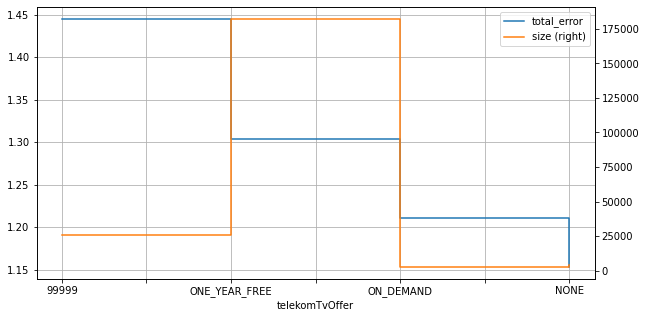

                total_error    size
telekomTvOffer                     
99999              1.444404   25938
ONE_YEAR_FREE      1.303794  181826
ON_DEMAND          1.210436    2918
NONE               1.153896    3885
                total_error    size
telekomTvOffer                     
99999              1.444404   25938
ONE_YEAR_FREE      1.303794  181826
ON_DEMAND          1.210436    2918
NONE               1.153896    3885
-------------- geo_krs -------------


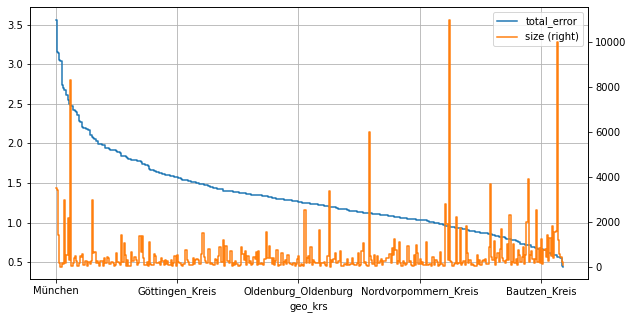

                     total_error  size
geo_krs                               
München                 3.562592  3496
Frankfurt_am_Main       3.154737  3420
Stuttgart               3.140944  1407
Nordfriesland_Kreis     3.049401   187
Kronach_Kreis           3.043077    11
Dachau_Kreis            2.733265   170
Miesbach_Kreis          2.699800   138
Hamburg                 2.676893  2993
Rastatt_Kreis           2.676256   192
München_Kreis           2.615418   509
                        total_error   size
geo_krs                                   
Zwickau_Kreis              0.595016   1841
Salzgitter                 0.589106    400
Plauen                     0.587184   1565
Gera                       0.585365   1596
Chemnitz                   0.571349  10020
Burgenlandkreis            0.570638   1192
Mansfeld_Südharz_Kreis     0.567141    567
Greiz_Kreis                0.556764    445
Hoyerswerda                0.445790    238
Kyffhäuserkreis            0.443615     99
-------------- h

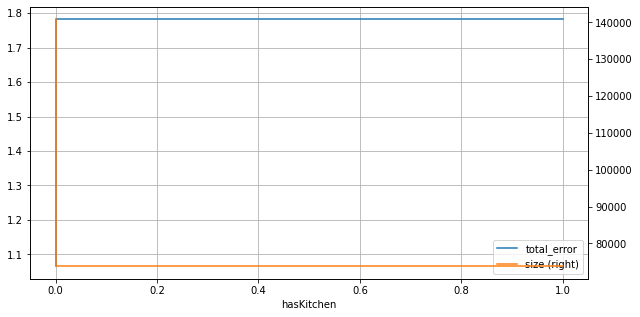

            total_error    size
hasKitchen                     
1              1.781931   73737
0              1.064998  140830
            total_error    size
hasKitchen                     
1              1.781931   73737
0              1.064998  140830
-------------- petsAllowed -------------


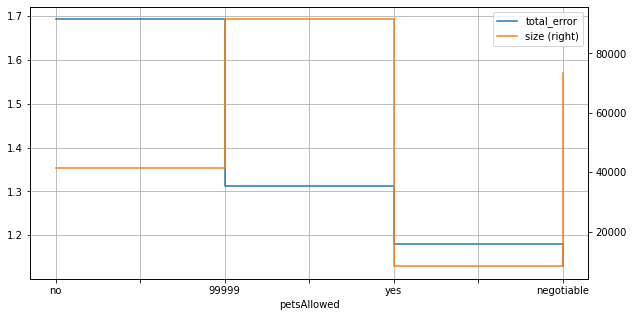

             total_error   size
petsAllowed                    
no              1.692702  41463
99999           1.311543  91418
yes             1.179455   8308
negotiable      1.128850  73378
             total_error   size
petsAllowed                    
no              1.692702  41463
99999           1.311543  91418
yes             1.179455   8308
negotiable      1.128850  73378
-------------- lift -------------


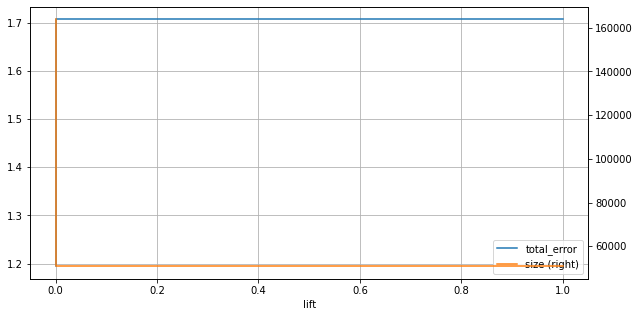

      total_error    size
lift                     
1        1.707056   50749
0        1.194072  163818
      total_error    size
lift                     
1        1.707056   50749
0        1.194072  163818
-------------- garden -------------


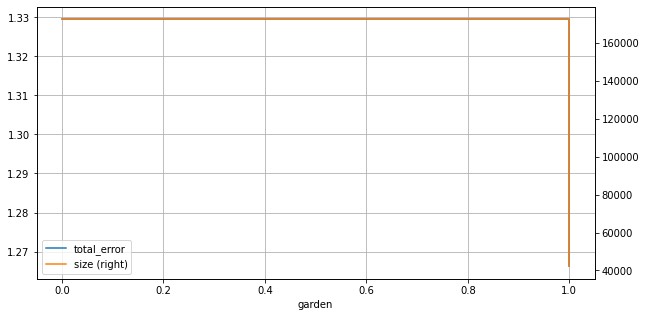

        total_error    size
garden                     
0          1.329477  172469
1          1.266190   42098
        total_error    size
garden                     
0          1.329477  172469
1          1.266190   42098
-------------- geo_krs_baseRent_size -------------
edges [1.1000e+01 2.0900e+02 3.5600e+02 5.1600e+02 7.3700e+02 1.1140e+03
 1.6270e+03 2.5270e+03 3.6840e+03 8.3190e+03 1.1022e+04]
categories 237905    6
143718    7
53329     3
198945    5
193723    2
         ..
119879    7
259178    2
131932    2
146867    3
121958    5
Name: geo_krs_baseRent_size, Length: 214567, dtype: int64


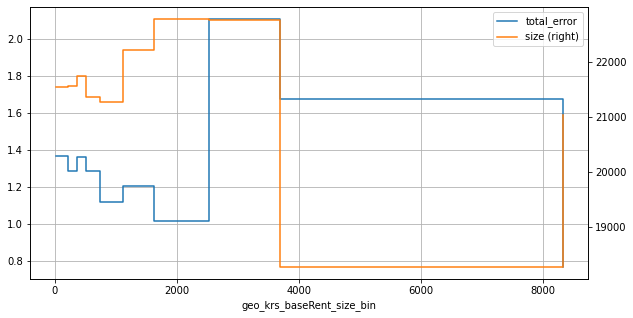

                           total_error   size
geo_krs_baseRent_size_bin                    
11.0                          1.365885  21549
209.0                         1.285179  21558
356.0                         1.361648  21740
516.0                         1.284945  21360
737.0                         1.119984  21278
1114.0                        1.203956  22217
1627.0                        1.018254  22774
2527.0                        2.104818  22767
3684.0                        1.674404  18282
8319.0                        0.771287  21042
                           total_error   size
geo_krs_baseRent_size_bin                    
11.0                          1.365885  21549
209.0                         1.285179  21558
356.0                         1.361648  21740
516.0                         1.284945  21360
737.0                         1.119984  21278
1114.0                        1.203956  22217
1627.0                        1.018254  22774
2527.0                        2.10

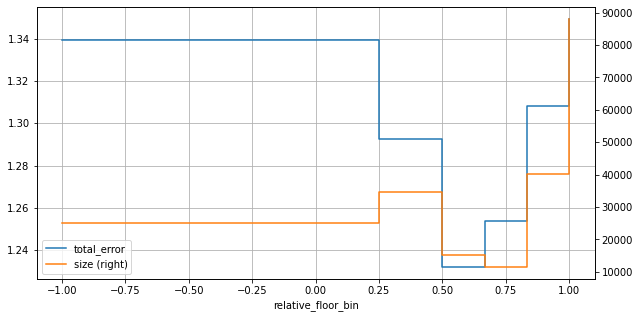

                    total_error   size
relative_floor_bin                    
-1.000000              1.339183  24956
 0.250000              1.292546  34615
 0.500000              1.232263  15305
 0.666667              1.253990  11631
 0.833333              1.308334  40147
 1.000000              1.349133  87913
                    total_error   size
relative_floor_bin                    
-1.000000              1.339183  24956
 0.250000              1.292546  34615
 0.500000              1.232263  15305
 0.666667              1.253990  11631
 0.833333              1.308334  40147
 1.000000              1.349133  87913
-------------- streetPlain_baseRent_size -------------
edges [1.0000e+00 2.0000e+00 5.0000e+00 9.0000e+00 1.9000e+01 4.3000e+01
 1.5300e+02 9.9999e+04]
categories 237905    3
143718    6
53329     6
198945    2
193723    3
         ..
119879    2
259178    0
131932    3
146867    5
121958    0
Name: streetPlain_baseRent_size, Length: 214567, dtype: int64


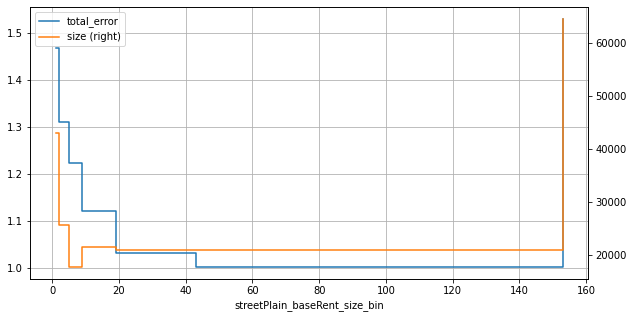

                               total_error   size
streetPlain_baseRent_size_bin                    
1.0                               1.467916  43027
2.0                               1.309881  25744
5.0                               1.222387  17901
9.0                               1.120948  21544
19.0                              1.031937  21046
43.0                              1.002776  20962
153.0                             1.529055  64343
                               total_error   size
streetPlain_baseRent_size_bin                    
1.0                               1.467916  43027
2.0                               1.309881  25744
5.0                               1.222387  17901
9.0                               1.120948  21544
19.0                              1.031937  21046
43.0                              1.002776  20962
153.0                             1.529055  64343
-------------- serviceCharge -------------
edges [0.0000e+00 6.6000e+01 8.6000e+01 1.0000e+02 1.2000

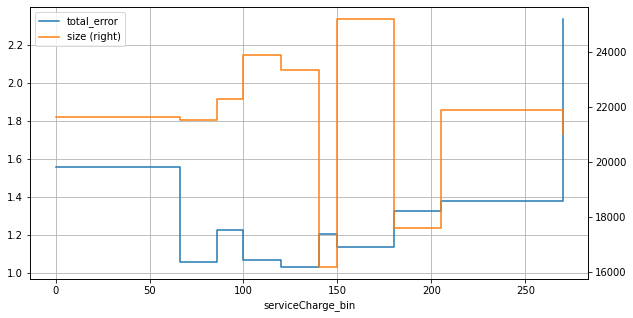

                   total_error   size
serviceCharge_bin                    
0.0                   1.557127  21643
66.0                  1.059413  21521
86.0                  1.227132  22295
100.0                 1.070357  23907
120.0                 1.034299  23352
140.0                 1.202750  16181
150.0                 1.139399  25187
180.0                 1.328260  17577
205.0                 1.380103  21903
270.0                 2.331952  21001
                   total_error   size
serviceCharge_bin                    
0.0                   1.557127  21643
66.0                  1.059413  21521
86.0                  1.227132  22295
100.0                 1.070357  23907
120.0                 1.034299  23352
140.0                 1.202750  16181
150.0                 1.139399  25187
180.0                 1.328260  17577
205.0                 1.380103  21903
270.0                 2.331952  21001
-------------- interiorQual_baseRent_size -------------
edges [ 1600. 51654. 65361. 9999

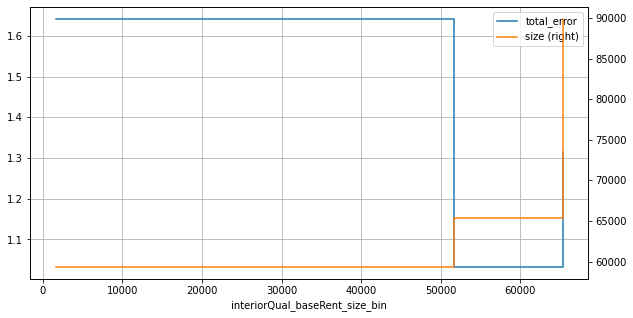

                                total_error   size
interiorQual_baseRent_size_bin                    
1600.0                             1.640663  59383
51654.0                            1.033433  65361
65361.0                            1.315378  89823
                                total_error   size
interiorQual_baseRent_size_bin                    
1600.0                             1.640663  59383
51654.0                            1.033433  65361
65361.0                            1.315378  89823
-------------- interiorQual -------------


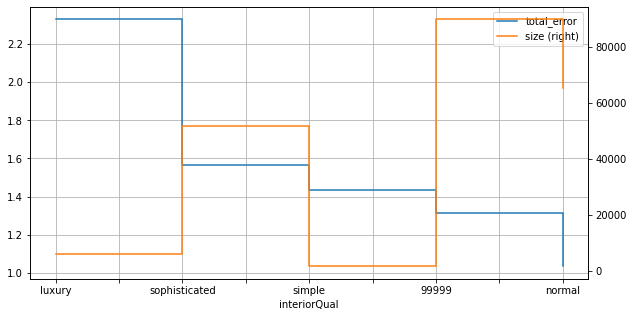

               total_error   size
interiorQual                     
luxury            2.329536   6129
sophisticated     1.566252  51654
simple            1.435468   1600
99999             1.315378  89823
normal            1.033433  65361
               total_error   size
interiorQual                     
luxury            2.329536   6129
sophisticated     1.566252  51654
simple            1.435468   1600
99999             1.315378  89823
normal            1.033433  65361
-------------- telekomTvOffer_baseRent_size -------------
edges [  2918.  99999. 181826.]
categories 237905    1
143718    1
53329     0
198945    0
193723    1
         ..
119879    1
259178    1
131932    0
146867    0
121958    1
Name: telekomTvOffer_baseRent_size, Length: 214567, dtype: int64


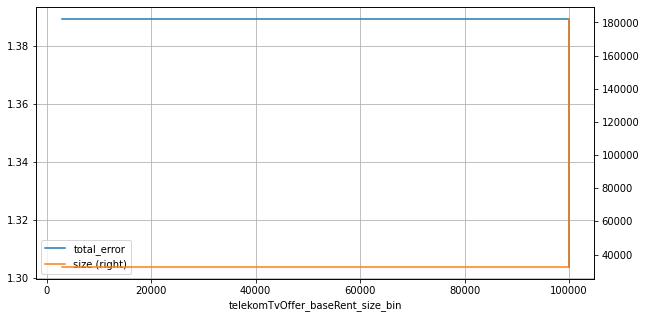

                                  total_error    size
telekomTvOffer_baseRent_size_bin                     
2918.0                               1.389026   32741
99999.0                              1.303794  181826
                                  total_error    size
telekomTvOffer_baseRent_size_bin                     
2918.0                               1.389026   32741
99999.0                              1.303794  181826
-------------- streetPlain -------------


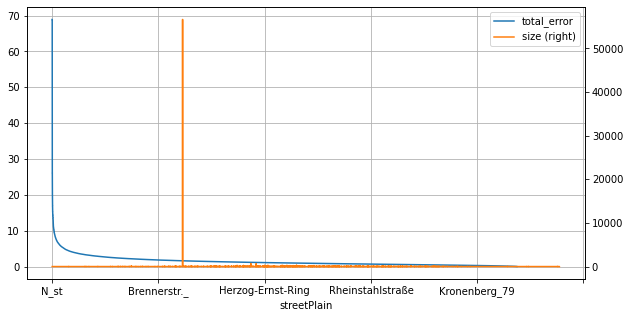

                       total_error  size
streetPlain                             
N_st                     68.918606     1
Rückertstr._             50.136432     1
Birkenauer_Straße        41.742266     2
Dietlindenstr            36.902081     1
Mittermayerstr           33.072609     1
Am_Heidehaus             31.621349     1
Wandsbeker_Zollstraße    28.837332     1
Am_Moosfeld              28.097893     1
Hirsauer_Straße          26.979329     1
Karl_Theodor_Straße      26.797308     1
                            total_error  size
streetPlain                                  
Äußere_Zeulenrodaer_Straße          NaN     1
Ölhafendamm                         NaN     1
Österkoppel                         NaN     2
Österreicherstr.                    NaN     1
Öttinger_Str.                       NaN     1
Über_dem_Wechsel                    NaN     2
Über_der_Lehmkuhle                  NaN     1
Überruhrstraße                      NaN     2
Ückelhofer_Straße                   NaN     3
Ük

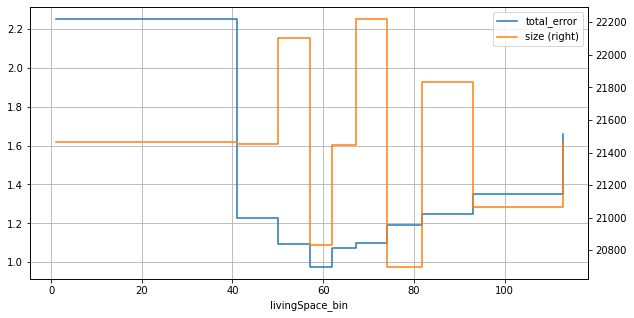

                 total_error   size
livingSpace_bin                    
1.00                2.248028  21463
40.95               1.229659  21455
50.03               1.092941  22103
57.00               0.978434  20830
61.85               1.075210  21445
67.34               1.099331  22218
74.00               1.194342  20699
81.80               1.250283  21834
93.00               1.352352  21064
112.85              1.659179  21456
                 total_error   size
livingSpace_bin                    
1.00                2.248028  21463
40.95               1.229659  21455
50.03               1.092941  22103
57.00               0.978434  20830
61.85               1.075210  21445
67.34               1.099331  22218
74.00               1.194342  20699
81.80               1.250283  21834
93.00               1.352352  21064
112.85              1.659179  21456
-------------- newlyConst -------------


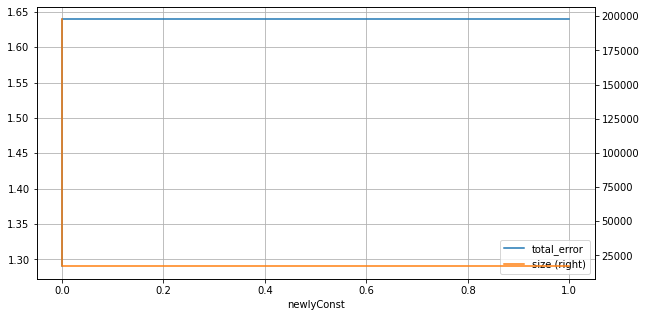

            total_error    size
newlyConst                     
1              1.639195   16854
0              1.290180  197713
            total_error    size
newlyConst                     
1              1.639195   16854
0              1.290180  197713
-------------- typeOfFlat_baseRent_size -------------
edges [   769.   7634.  25127.  27874.  99999. 104805.]
categories 237905    1
143718    4
53329     1
198945    1
193723    1
         ..
119879    1
259178    1
131932    4
146867    4
121958    1
Name: typeOfFlat_baseRent_size, Length: 214567, dtype: int64


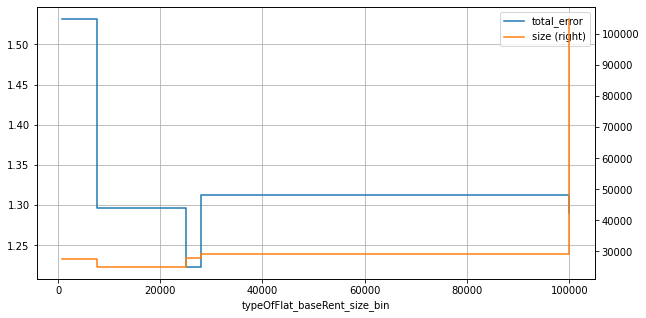

                              total_error    size
typeOfFlat_baseRent_size_bin                     
769.0                            1.531033   27539
7634.0                           1.296226   25127
25127.0                          1.223705   27874
27874.0                          1.312167   29222
99999.0                          1.290330  104805
                              total_error    size
typeOfFlat_baseRent_size_bin                     
769.0                            1.531033   27539
7634.0                           1.296226   25127
25127.0                          1.223705   27874
27874.0                          1.312167   29222
99999.0                          1.290330  104805
-------------- heatingType_baseRent_size -------------
edges [   126.  14130.  15908.  19854.  99999. 102952.]
categories 237905    4
143718    4
53329     1
198945    1
193723    4
         ..
119879    3
259178    0
131932    3
146867    3
121958    4
Name: heatingType_baseRent_size, Length: 21456

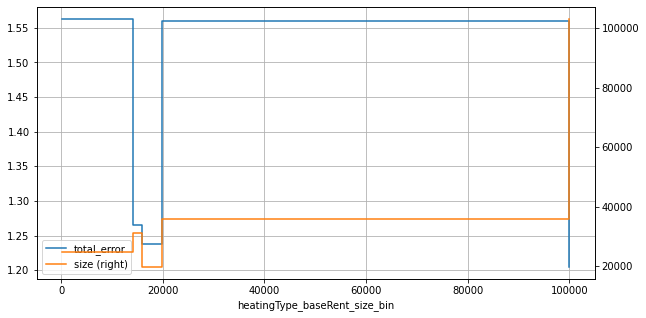

                               total_error    size
heatingType_baseRent_size_bin                     
126.0                             1.562022   24836
14130.0                           1.265091   31209
15908.0                           1.237660   19854
19854.0                           1.559158   35716
99999.0                           1.205298  102952
                               total_error    size
heatingType_baseRent_size_bin                     
126.0                             1.562022   24836
14130.0                           1.265091   31209
15908.0                           1.237660   19854
19854.0                           1.559158   35716
99999.0                           1.205298  102952
-------------- geo_bln -------------


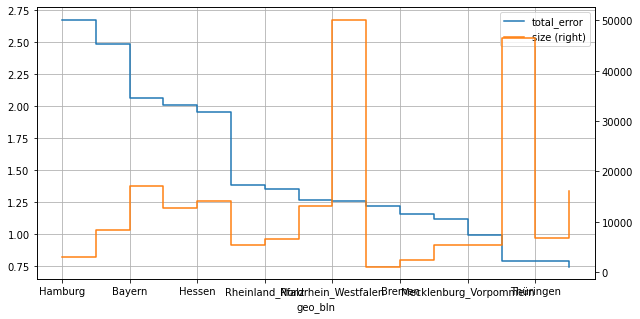

                     total_error   size
geo_bln                                
Hamburg                 2.676893   2993
Berlin                  2.487495   8319
Bayern                  2.065635  17210
Baden_Württemberg       2.008449  12816
Hessen                  1.950454  14224
Schleswig_Holstein      1.382938   5341
Rheinland_Pfalz         1.347464   6706
Niedersachsen           1.263527  13221
Nordrhein_Westfalen     1.257556  50102
Saarland                1.220223   1150
                        total_error   size
geo_bln                                   
Rheinland_Pfalz            1.347464   6706
Niedersachsen              1.263527  13221
Nordrhein_Westfalen        1.257556  50102
Saarland                   1.220223   1150
Bremen                     1.157571   2370
Brandenburg                1.118777   5512
Mecklenburg_Vorpommern     0.987039   5341
Sachsen                    0.790076  46418
Thüringen                  0.788869   6736
Sachsen_Anhalt             0.742054  16108
----

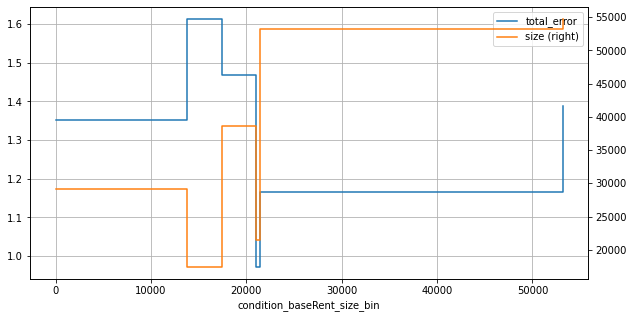

                             total_error   size
condition_baseRent_size_bin                    
3.0                             1.352019  29156
13784.0                         1.612227  17496
17496.0                         1.467501  38623
20978.0                         0.972884  21454
21454.0                         1.165543  53184
53184.0                         1.388418  54654
                             total_error   size
condition_baseRent_size_bin                    
3.0                             1.352019  29156
13784.0                         1.612227  17496
17496.0                         1.467501  38623
20978.0                         0.972884  21454
21454.0                         1.165543  53184
53184.0                         1.388418  54654


In [11]:
features_0_size = features_0 + size_features

data_modelled, samples_error = features_mod_pipeline(data_train = data_train,
                                                        data_train_transformed = data_train_transformed,
                                                        features_1 = features_0_size, #Now with size features
                                                        features_2 = features_0_size,
                                                        plot_error_features = True, 
                                                        threshold = 10,
                                                        cat_features = True)

It improves a little bit, but if we look at the error distribution in comparison with the counts of each class, we observe that there is a lot of room for improvement. The model with this feature is able to recognize that where it has more error the value count is lower but it cannot identify in which direction. I will use this information in future steps!

#### Compare if it is better to have the categorical features as they are or the mean of the group

TOTAL ERROR: 1.249824475833805
ERROR_1: 1.0712548459989326
ERROR_2: 0.1824681802752126


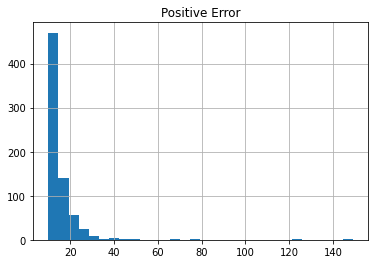

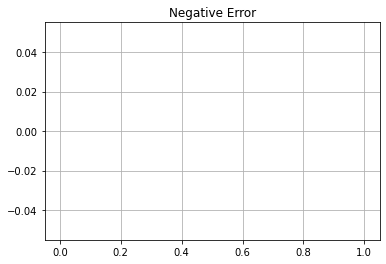

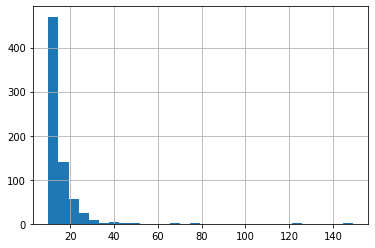

-------------- geo_krs_price_costs_mean -------------
edges [ 98.375      134.9123582  140.6067518  152.20945946 162.06331155
 170.62832609 173.95906832 180.38014706 191.14032723 219.93080347
 239.65824176]
categories 237905    3
143718    9
53329     8
198945    5
193723    1
         ..
119879    6
259178    3
131932    1
146867    4
121958    6
Name: geo_krs_price_costs_mean, Length: 214567, dtype: int64


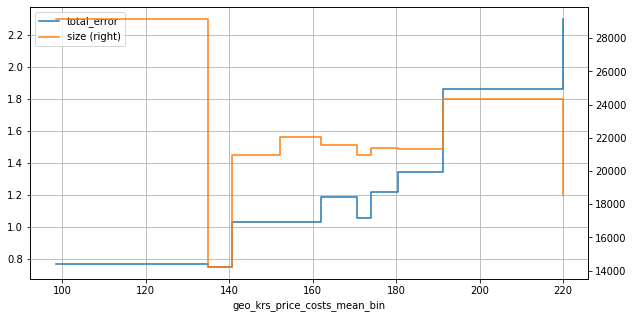

                              total_error   size
geo_krs_price_costs_mean_bin                    
98.375000                        0.764905  29131
134.912358                       0.751973  14249
140.606752                       1.028844  20993
152.209459                       1.027862  22029
162.063312                       1.188381  21585
170.628326                       1.055534  20965
173.959068                       1.218326  21387
180.380147                       1.339552  21324
191.140327                       1.858415  24350
219.930803                       2.295702  18554
                              total_error   size
geo_krs_price_costs_mean_bin                    
98.375000                        0.764905  29131
134.912358                       0.751973  14249
140.606752                       1.028844  20993
152.209459                       1.027862  22029
162.063312                       1.188381  21585
170.628326                       1.055534  20965
173.959068          

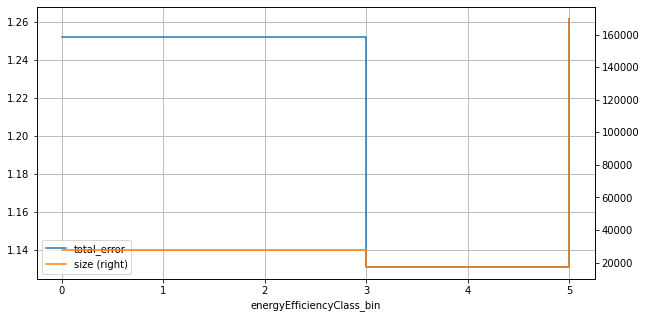

                           total_error    size
energyEfficiencyClass_bin                     
0.0                           1.252121   27613
3.0                           1.131438   17544
5.0                           1.261088  169410
                           total_error    size
energyEfficiencyClass_bin                     
0.0                           1.252121   27613
3.0                           1.131438   17544
5.0                           1.261088  169410
-------------- electricityKwhPrice -------------
edges [1.7050e-01 1.9850e-01 9.9999e+04]
categories 237905    1
143718    0
53329     1
198945    1
193723    1
         ..
119879    1
259178    1
131932    1
146867    0
121958    1
Name: electricityKwhPrice, Length: 214567, dtype: int64


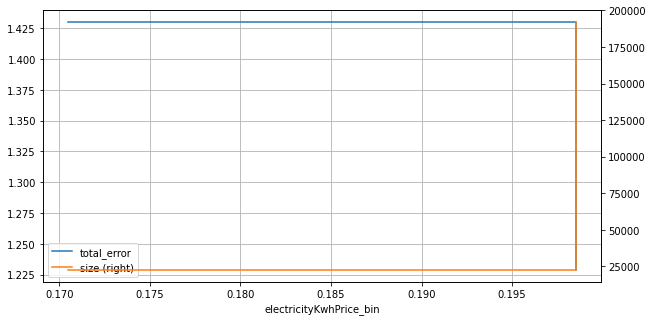

                         total_error    size
electricityKwhPrice_bin                     
0.1705                      1.429758   22822
0.1985                      1.229116  191745
                         total_error    size
electricityKwhPrice_bin                     
0.1705                      1.429758   22822
0.1985                      1.229116  191745
-------------- noRooms -------------
edges [  1.     2.     3.     4.   999.99]
categories 237905    1
143718    1
53329     1
198945    0
193723    0
         ..
119879    0
259178    1
131932    0
146867    2
121958    0
Name: noRooms, Length: 214567, dtype: int64


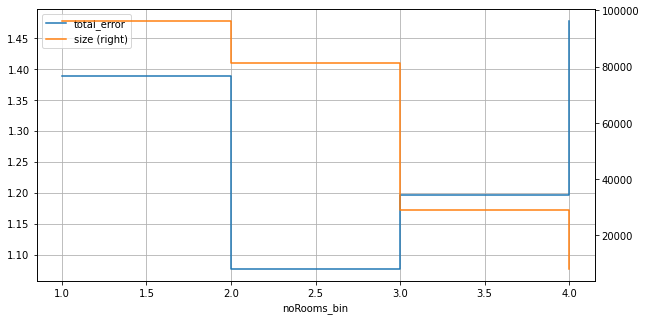

             total_error   size
noRooms_bin                    
1.0             1.388856  96081
2.0             1.077512  81291
3.0             1.196334  29047
4.0             1.476430   8148
             total_error   size
noRooms_bin                    
1.0             1.388856  96081
2.0             1.077512  81291
3.0             1.196334  29047
4.0             1.476430   8148
-------------- geo_bln_baseRent_size -------------
edges [ 1150.  5512.  8319. 13221. 16108. 17210. 46418. 50102.]
categories 237905    6
143718    0
53329     0
198945    6
193723    0
         ..
119879    6
259178    6
131932    1
146867    0
121958    6
Name: geo_bln_baseRent_size, Length: 214567, dtype: int64


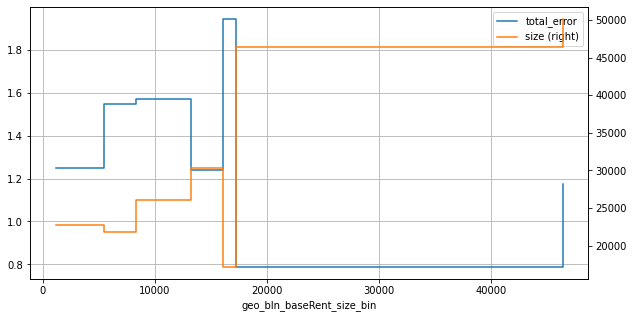

                           total_error   size
geo_bln_baseRent_size_bin                    
1150.0                        1.250104  22707
5512.0                        1.548126  21761
8319.0                        1.570055  26037
13221.0                       1.237802  30332
16108.0                       1.941548  17210
17210.0                       0.790020  46418
46418.0                       1.176784  50102
                           total_error   size
geo_bln_baseRent_size_bin                    
1150.0                        1.250104  22707
5512.0                        1.548126  21761
8319.0                        1.570055  26037
13221.0                       1.237802  30332
16108.0                       1.941548  17210
17210.0                       0.790020  46418
46418.0                       1.176784  50102
-------------- years_last_refurbish -------------
edges [0.000e+00 1.000e+00 4.000e+00 1.004e+03]
categories 237905    0
143718    0
53329     0
198945    2
193723    0
   

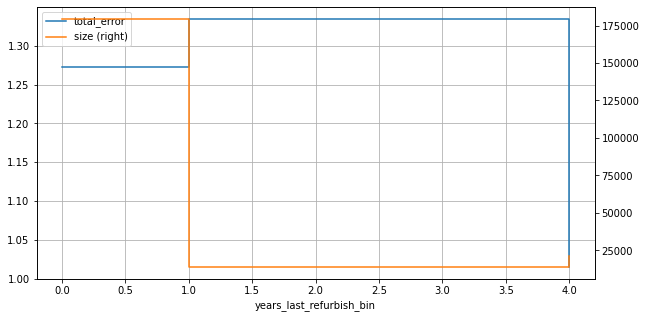

                          total_error    size
years_last_refurbish_bin                     
0.0                          1.272576  179048
1.0                          1.334034   14260
4.0                          1.015478   21259
                          total_error    size
years_last_refurbish_bin                     
0.0                          1.272576  179048
1.0                          1.334034   14260
4.0                          1.015478   21259
-------------- years_old -------------
edges [   0.    2.   22.   34.   46.   56.   69.  110. 1018.]
categories 237905    5
143718    3
53329     1
198945    5
193723    2
         ..
119879    6
259178    3
131932    0
146867    0
121958    1
Name: years_old, Length: 214567, dtype: int64


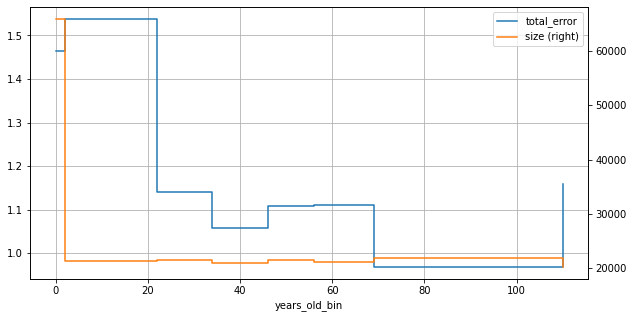

               total_error   size
years_old_bin                    
0.0               1.464786  65836
2.0               1.536821  21342
22.0              1.140926  21561
34.0              1.057750  21012
46.0              1.107920  21477
56.0              1.109950  21206
69.0              0.969169  21846
110.0             1.159883  20287
               total_error   size
years_old_bin                    
0.0               1.464786  65836
2.0               1.536821  21342
22.0              1.140926  21561
34.0              1.057750  21012
46.0              1.107920  21477
56.0              1.109950  21206
69.0              0.969169  21846
110.0             1.159883  20287
-------------- garden_baseRent_size -------------
edges [ 42098. 172469.]
categories 237905    0
143718    0
53329     0
198945    0
193723    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: garden_baseRent_size, Length: 214567, dtype: int64


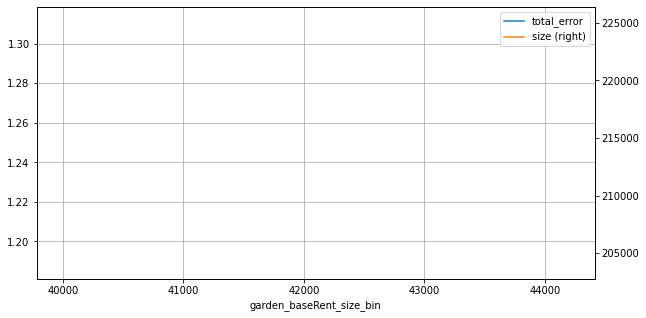

                          total_error    size
garden_baseRent_size_bin                     
42098.0                      1.249824  214567
                          total_error    size
garden_baseRent_size_bin                     
42098.0                      1.249824  214567
-------------- heatingType -------------


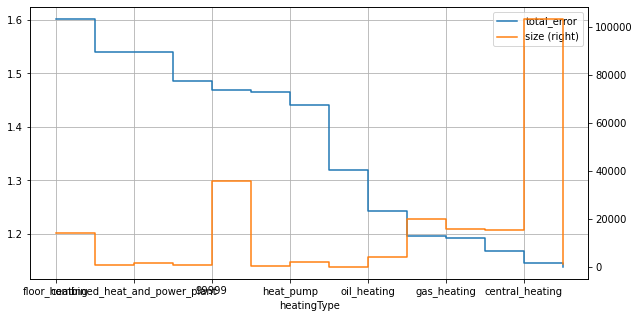

                               total_error   size
heatingType                                      
floor_heating                     1.600823  14130
electric_heating                  1.540765    714
combined_heat_and_power_plant     1.539662   1548
wood_pellet_heating               1.485674    782
99999                             1.468584  35716
stove_heating                     1.464407    268
heat_pump                         1.440243   2165
solar_heating                     1.319222    126
oil_heating                       1.242412   4034
district_heating                  1.196686  19854
                                total_error    size
heatingType                                        
99999                              1.468584   35716
stove_heating                      1.464407     268
heat_pump                          1.440243    2165
solar_heating                      1.319222     126
oil_heating                        1.242412    4034
district_heating                   1

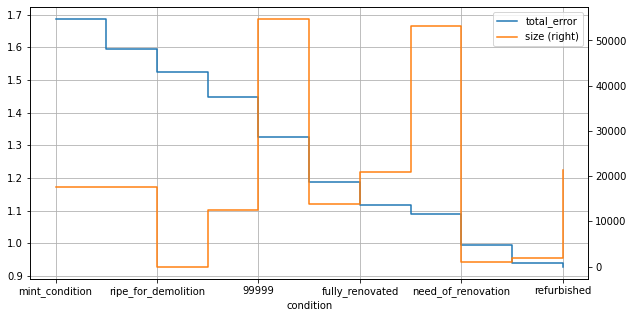

                                    total_error   size
condition                                             
mint_condition                         1.685303  17645
first_time_use                         1.593758  17496
ripe_for_demolition                    1.524278      3
first_time_use_after_refurbishment     1.447721  12466
99999                                  1.326176  54654
modernized                             1.186669  13784
fully_renovated                        1.117817  20978
well_kept                              1.088292  53184
need_of_renovation                     0.994889   1101
negotiable                             0.939980   1802
                                    total_error   size
condition                                             
first_time_use                         1.593758  17496
ripe_for_demolition                    1.524278      3
first_time_use_after_refurbishment     1.447721  12466
99999                                  1.326176  54654
modernized

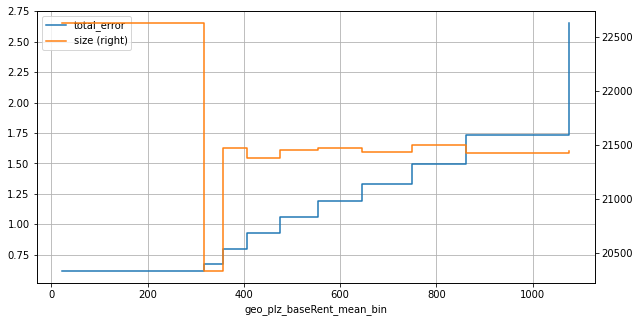

                           total_error   size
geo_plz_baseRent_mean_bin                    
22.000000                     0.621358  22628
317.785406                    0.674457  20340
356.357864                    0.799126  21476
406.246667                    0.929275  21385
474.603684                    1.063316  21456
553.980840                    1.195425  21472
644.620299                    1.328198  21440
748.514229                    1.494032  21502
860.763636                    1.733289  21424
1075.857143                   2.649133  21444
                           total_error   size
geo_plz_baseRent_mean_bin                    
22.000000                     0.621358  22628
317.785406                    0.674457  20340
356.357864                    0.799126  21476
406.246667                    0.929275  21385
474.603684                    1.063316  21456
553.980840                    1.195425  21472
644.620299                    1.328198  21440
748.514229                    1.49

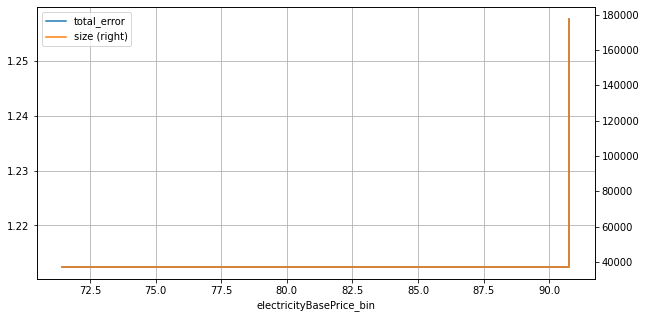

                          total_error    size
electricityBasePrice_bin                     
71.43                        1.212497   37362
90.76                        1.257626  177205
                          total_error    size
electricityBasePrice_bin                     
71.43                        1.212497   37362
90.76                        1.257626  177205
-------------- streetPlain_baseRent_mean -------------
edges [3.00000000e+01 3.21490000e+02 3.85000000e+02 4.50159118e+02
 5.19837059e+02 6.06020000e+02 7.70000000e+02 1.24036875e+03
 9.99990000e+04]
categories 237905    1
143718    7
53329     7
198945    3
193723    0
         ..
119879    0
259178    4
131932    0
146867    3
121958    5
Name: streetPlain_baseRent_mean, Length: 214567, dtype: int64


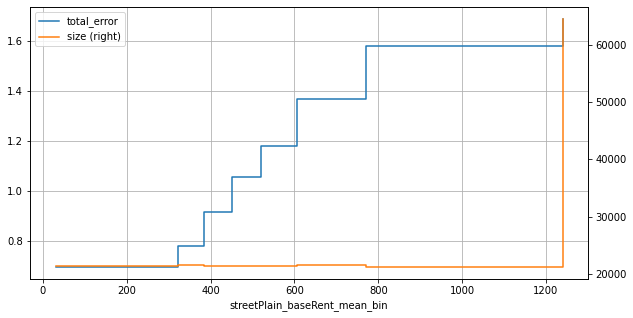

                               total_error   size
streetPlain_baseRent_mean_bin                    
30.000000                         0.697543  21473
321.490000                        0.779387  21570
385.000000                        0.915477  21357
450.159118                        1.055814  21444
519.837059                        1.178451  21442
606.020000                        1.366996  21595
770.000000                        1.579264  21319
1240.368750                       1.685658  64367
                               total_error   size
streetPlain_baseRent_mean_bin                    
30.000000                         0.697543  21473
321.490000                        0.779387  21570
385.000000                        0.915477  21357
450.159118                        1.055814  21444
519.837059                        1.178451  21442
606.020000                        1.366996  21595
770.000000                        1.579264  21319
1240.368750                       1.685658  64367


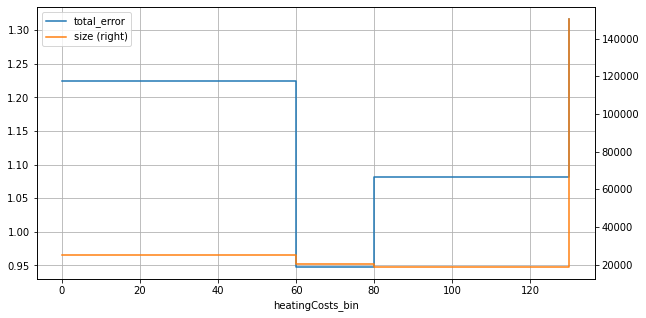

                  total_error    size
heatingCosts_bin                     
0.0                  1.224800   25321
60.0                 0.948415   20118
80.0                 1.080918   18979
130.0                1.316089  150149
                  total_error    size
heatingCosts_bin                     
0.0                  1.224800   25321
60.0                 0.948415   20118
80.0                 1.080918   18979
130.0                1.316089  150149
-------------- telekomHybridUploadSpeed -------------
edges [1.0000e+01 9.9999e+04]
categories 237905    0
143718    0
53329     0
198945    0
193723    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: telekomHybridUploadSpeed, Length: 214567, dtype: int64


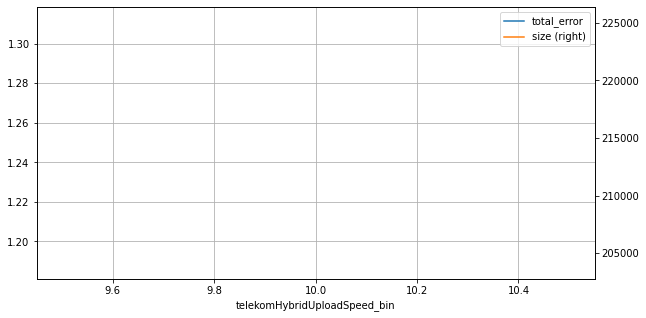

                              total_error    size
telekomHybridUploadSpeed_bin                     
10.0                             1.249824  214567
                              total_error    size
telekomHybridUploadSpeed_bin                     
10.0                             1.249824  214567
-------------- typeOfFlat -------------


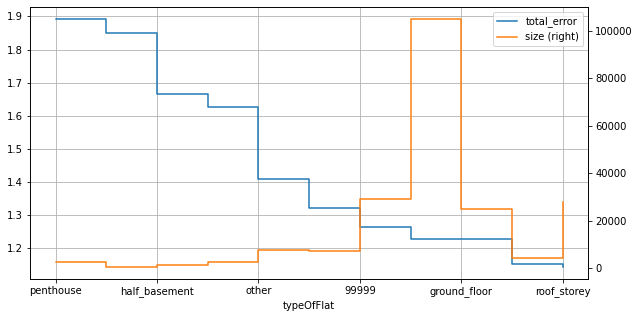

                     total_error    size
typeOfFlat                              
penthouse               1.890734    2843
loft                    1.851200     769
half_basement           1.666890    1604
terraced_flat           1.626273    2731
other                   1.408578    7634
maisonette              1.321914    7466
99999                   1.265454   29222
apartment               1.228728  104805
ground_floor            1.228048   25127
raised_ground_floor     1.153383    4492
                     total_error    size
typeOfFlat                              
loft                    1.851200     769
half_basement           1.666890    1604
terraced_flat           1.626273    2731
other                   1.408578    7634
maisonette              1.321914    7466
99999                   1.265454   29222
apartment               1.228728  104805
ground_floor            1.228048   25127
raised_ground_floor     1.153383    4492
roof_storey             1.144826   27874
-------------- g

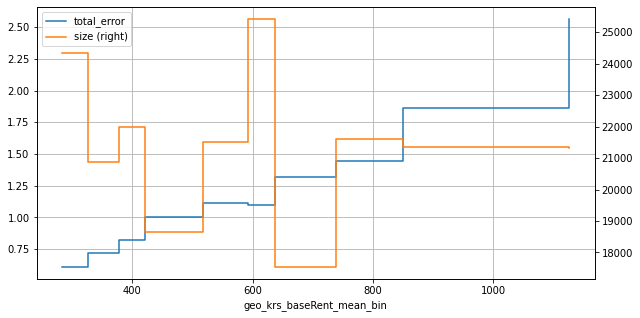

                           total_error   size
geo_krs_baseRent_mean_bin                    
283.582138                    0.613162  24330
326.958573                    0.721881  20874
377.725952                    0.819515  21978
420.817498                    1.000708  18654
518.168831                    1.112254  21514
591.737234                    1.098680  25402
637.054921                    1.320823  17553
738.169639                    1.447190  21598
849.333175                    1.865971  21350
1125.733193                   2.560776  21314
                           total_error   size
geo_krs_baseRent_mean_bin                    
283.582138                    0.613162  24330
326.958573                    0.721881  20874
377.725952                    0.819515  21978
420.817498                    1.000708  18654
518.168831                    1.112254  21514
591.737234                    1.098680  25402
637.054921                    1.320823  17553
738.169639                    1.44

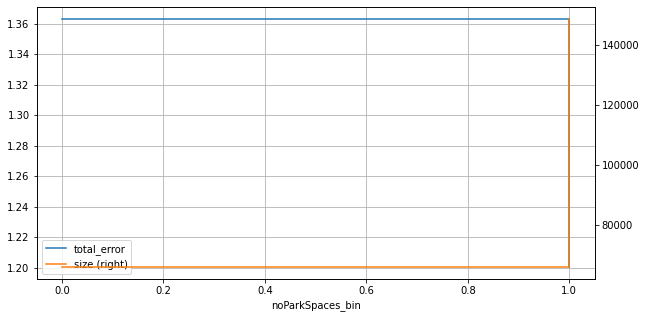

                  total_error    size
noParkSpaces_bin                     
0.0                  1.362696   65947
1.0                  1.200912  148620
                  total_error    size
noParkSpaces_bin                     
0.0                  1.362696   65947
1.0                  1.200912  148620
-------------- balcony -------------


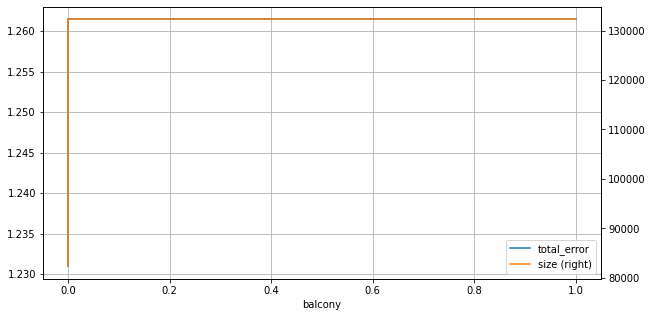

         total_error    size
balcony                     
1           1.261463  132259
0           1.230961   82308
         total_error    size
balcony                     
1           1.261463  132259
0           1.230961   82308
-------------- streetPlain_price_costs_mean -------------
edges [    0.           120.90322581   140.           151.31121739
   163.           180.           210.           373.33333333
 99999.        ]
categories 237905    2
143718    7
53329     7
198945    0
193723    0
         ..
119879    5
259178    6
131932    0
146867    2
121958    5
Name: streetPlain_price_costs_mean, Length: 214567, dtype: int64


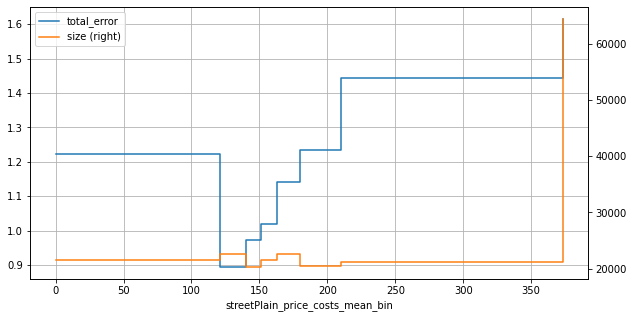

                                  total_error   size
streetPlain_price_costs_mean_bin                    
0.000000                             1.223888  21473
120.903226                           0.896174  22593
140.000000                           0.972731  20358
151.311217                           1.018520  21473
163.000000                           1.141581  22678
180.000000                           1.235492  20539
210.000000                           1.442709  21088
373.333333                           1.613688  64365
                                  total_error   size
streetPlain_price_costs_mean_bin                    
0.000000                             1.223888  21473
120.903226                           0.896174  22593
140.000000                           0.972731  20358
151.311217                           1.018520  21473
163.000000                           1.141581  22678
180.000000                           1.235492  20539
210.000000                           1.442709 

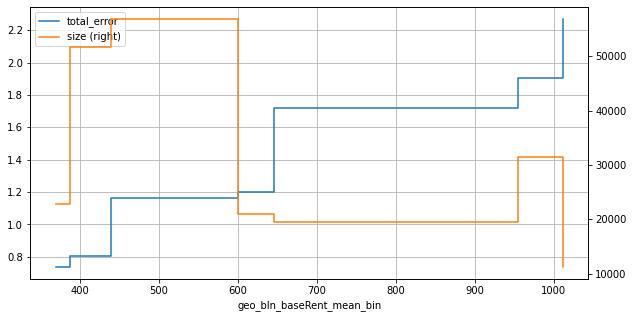

                           total_error   size
geo_bln_baseRent_mean_bin                    
369.138298                    0.739799  22844
387.404872                    0.807346  51759
438.932600                    1.164347  56764
600.442274                    1.201247  20932
645.297681                    1.720560  19522
954.754941                    1.907243  31434
1011.777183                   2.267247  11312
                           total_error   size
geo_bln_baseRent_mean_bin                    
369.138298                    0.739799  22844
387.404872                    0.807346  51759
438.932600                    1.164347  56764
600.442274                    1.201247  20932
645.297681                    1.720560  19522
954.754941                    1.907243  31434
1011.777183                   2.267247  11312
-------------- floor -------------
edges [-1.0000e+00  1.0000e+00  2.0000e+00  3.0000e+00  4.0000e+00  7.0000e+00
  9.9999e+04]
categories 237905    5
143718    0
53329    

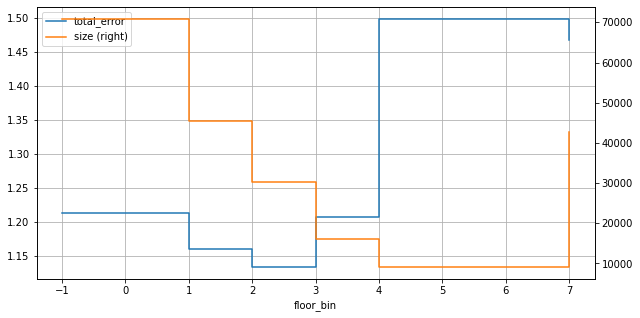

           total_error   size
floor_bin                    
-1.0          1.213728  70730
 1.0          1.160333  45487
 2.0          1.134642  30387
 3.0          1.206931  15972
 4.0          1.497520   9222
 7.0          1.467854  42769
           total_error   size
floor_bin                    
-1.0          1.213728  70730
 1.0          1.160333  45487
 2.0          1.134642  30387
 3.0          1.206931  15972
 4.0          1.497520   9222
 7.0          1.467854  42769
-------------- telekomUploadSpeed -------------
edges [1.0000e+00 2.4000e+00 1.0000e+01 4.0000e+01 9.9999e+04]
categories 237905    2
143718    2
53329     3
198945    3
193723    2
         ..
119879    2
259178    1
131932    3
146867    3
121958    2
Name: telekomUploadSpeed, Length: 214567, dtype: int64


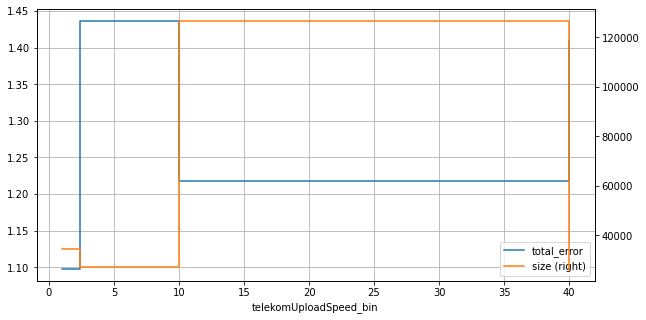

                        total_error    size
telekomUploadSpeed_bin                     
1.0                        1.098531   34354
2.4                        1.435540   27226
10.0                       1.218083  126351
40.0                       1.408289   26636
                        total_error    size
telekomUploadSpeed_bin                     
1.0                        1.098531   34354
2.4                        1.435540   27226
10.0                       1.218083  126351
40.0                       1.408289   26636
-------------- geo_plz_baseRent_size -------------
edges [1.000e+00 1.600e+01 3.300e+01 4.900e+01 6.500e+01 8.700e+01 1.130e+02
 1.600e+02 2.600e+02 4.850e+02 1.601e+03]
categories 237905    6
143718    2
53329     3
198945    7
193723    6
         ..
119879    6
259178    1
131932    7
146867    7
121958    4
Name: geo_plz_baseRent_size, Length: 214567, dtype: int64


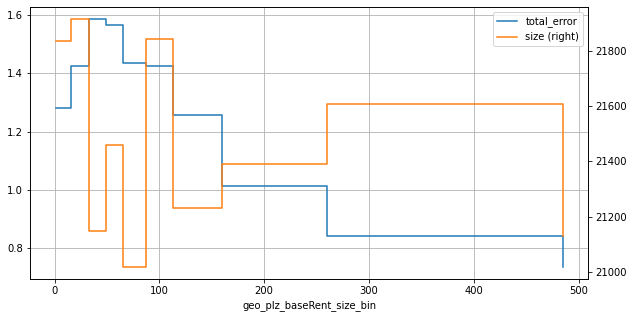

                           total_error   size
geo_plz_baseRent_size_bin                    
1.0                           1.280057  21834
16.0                          1.425544  21913
33.0                          1.585069  21146
49.0                          1.564995  21460
65.0                          1.434796  21019
87.0                          1.426500  21841
113.0                         1.256772  21229
160.0                         1.011789  21390
260.0                         0.842243  21607
485.0                         0.737004  21128
                           total_error   size
geo_plz_baseRent_size_bin                    
1.0                           1.280057  21834
16.0                          1.425544  21913
33.0                          1.585069  21146
49.0                          1.564995  21460
65.0                          1.434796  21019
87.0                          1.426500  21841
113.0                         1.256772  21229
160.0                         1.01

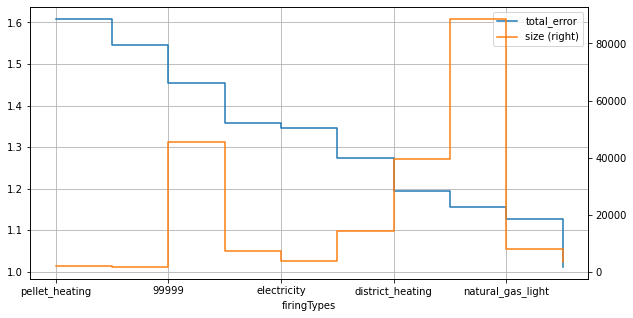

                   total_error   size
firingTypes                          
pellet_heating        1.607286   1968
geothermal            1.545689   1940
99999                 1.454352  45490
too_little_count      1.358428   7374
electricity           1.345009   3876
oil                   1.273637  14481
district_heating      1.195120  39405
gas                   1.156528  88383
natural_gas_light     1.127073   8015
natural_gas_heavy     1.012267   3635
                   total_error   size
firingTypes                          
pellet_heating        1.607286   1968
geothermal            1.545689   1940
99999                 1.454352  45490
too_little_count      1.358428   7374
electricity           1.345009   3876
oil                   1.273637  14481
district_heating      1.195120  39405
gas                   1.156528  88383
natural_gas_light     1.127073   8015
natural_gas_heavy     1.012267   3635
-------------- floor_lift -------------
edges [-9.9900e+02 -3.0000e+00 -2.0000e+00 -1.00

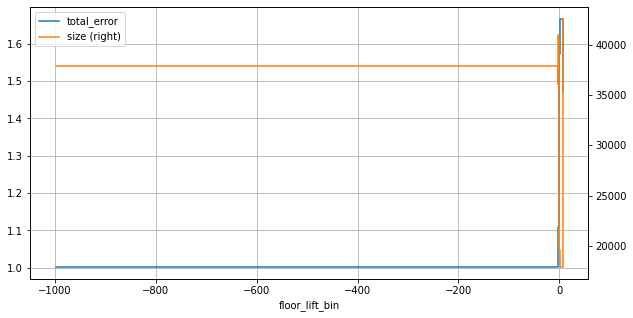

                total_error   size
floor_lift_bin                    
-999.0             1.003387  37877
-3.0               1.053243  36129
-2.0               1.110411  41008
-1.0               1.240207  19540
 0.0               1.572751  19540
 2.0               1.665023  17918
 7.0               1.469837  42555
                total_error   size
floor_lift_bin                    
-999.0             1.003387  37877
-3.0               1.053243  36129
-2.0               1.110411  41008
-1.0               1.240207  19540
 0.0               1.572751  19540
 2.0               1.665023  17918
 7.0               1.469837  42555
-------------- cellar -------------


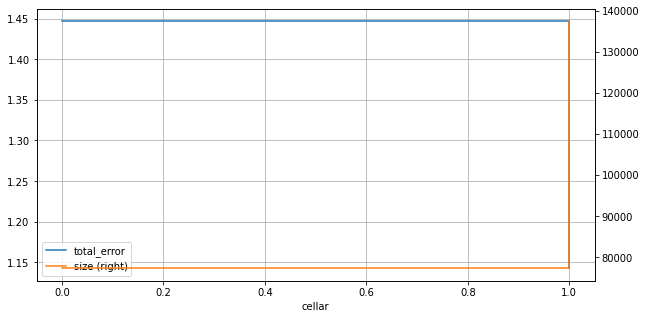

        total_error    size
cellar                     
0          1.446530   77199
1          1.142199  137368
        total_error    size
cellar                     
0          1.446530   77199
1          1.142199  137368
-------------- numberOfFloors -------------
edges [0.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00 6.0000e+00 9.9999e+04]
categories 237905    4
143718    4
53329     0
198945    3
193723    3
         ..
119879    0
259178    4
131932    4
146867    1
121958    4
Name: numberOfFloors, Length: 214567, dtype: int64


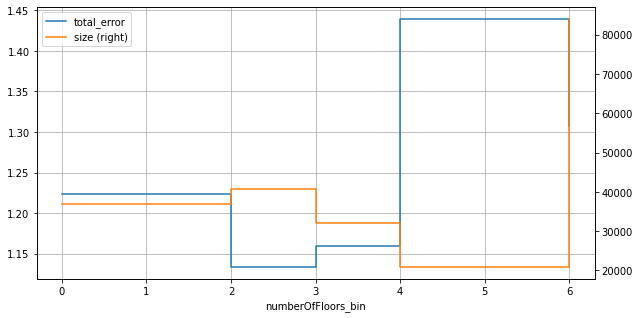

                    total_error   size
numberOfFloors_bin                    
0.0                    1.223383  36985
2.0                    1.133989  40713
3.0                    1.159691  32027
4.0                    1.438879  20978
6.0                    1.307344  83864
                    total_error   size
numberOfFloors_bin                    
0.0                    1.223383  36985
2.0                    1.133989  40713
3.0                    1.159691  32027
4.0                    1.438879  20978
6.0                    1.307344  83864
-------------- telekomTvOffer -------------


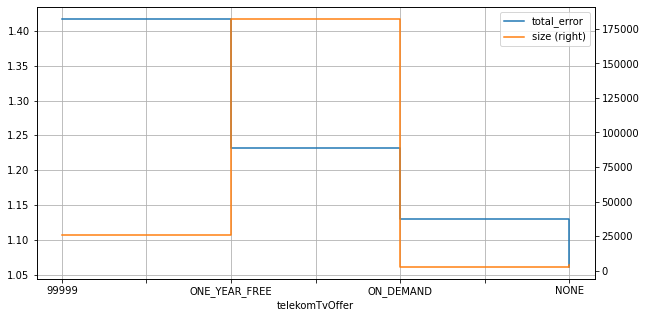

                total_error    size
telekomTvOffer                     
99999              1.416308   25938
ONE_YEAR_FREE      1.232216  181826
ON_DEMAND          1.129821    2918
NONE               1.061865    3885
                total_error    size
telekomTvOffer                     
99999              1.416308   25938
ONE_YEAR_FREE      1.232216  181826
ON_DEMAND          1.129821    2918
NONE               1.061865    3885
-------------- hasKitchen -------------


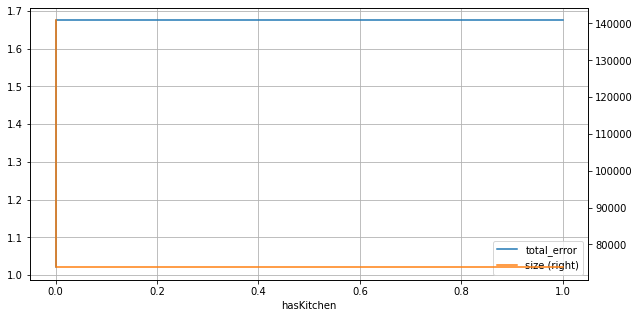

            total_error    size
hasKitchen                     
1              1.674648   73737
0              1.020007  140830
            total_error    size
hasKitchen                     
1              1.674648   73737
0              1.020007  140830
-------------- petsAllowed -------------


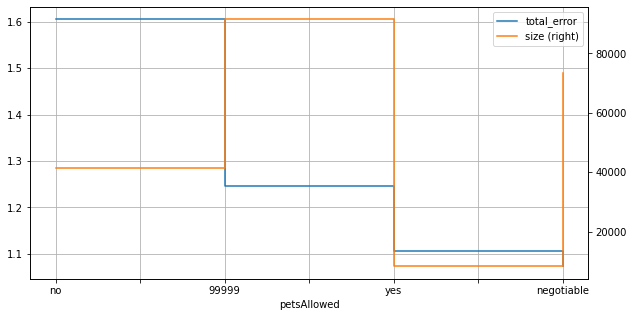

             total_error   size
petsAllowed                    
no              1.604777  41463
99999           1.245884  91418
yes             1.105513   8308
negotiable      1.073143  73378
             total_error   size
petsAllowed                    
no              1.604777  41463
99999           1.245884  91418
yes             1.105513   8308
negotiable      1.073143  73378
-------------- lift -------------


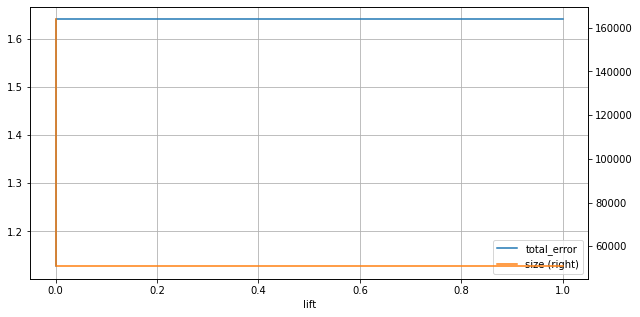

      total_error    size
lift                     
1        1.641177   50749
0        1.126905  163818
      total_error    size
lift                     
1        1.641177   50749
0        1.126905  163818
-------------- garden -------------


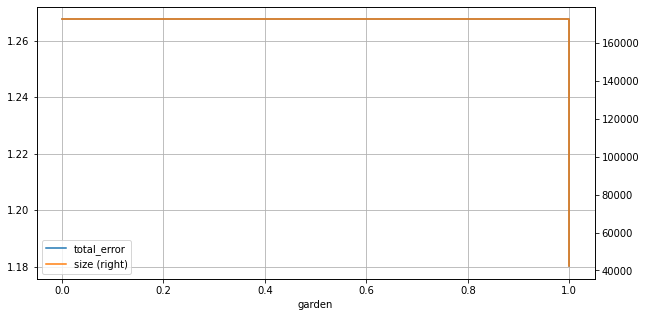

        total_error    size
garden                     
0          1.267485  172469
1          1.180122   42098
        total_error    size
garden                     
0          1.267485  172469
1          1.180122   42098
-------------- geo_krs_baseRent_size -------------
edges [1.1000e+01 2.0900e+02 3.5600e+02 5.1600e+02 7.3700e+02 1.1140e+03
 1.6270e+03 2.5270e+03 3.6840e+03 8.3190e+03 1.1022e+04]
categories 237905    6
143718    7
53329     3
198945    5
193723    2
         ..
119879    7
259178    2
131932    2
146867    3
121958    5
Name: geo_krs_baseRent_size, Length: 214567, dtype: int64


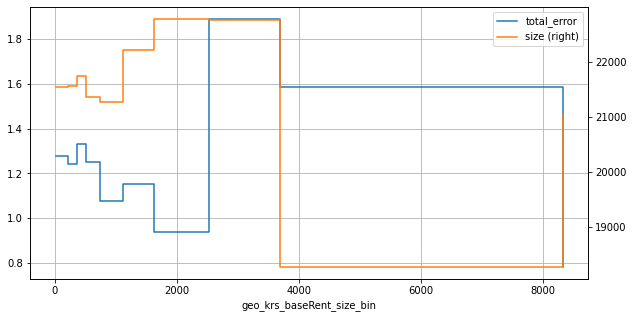

                           total_error   size
geo_krs_baseRent_size_bin                    
11.0                          1.277802  21549
209.0                         1.243095  21558
356.0                         1.333126  21740
516.0                         1.251958  21360
737.0                         1.075689  21278
1114.0                        1.152545  22217
1627.0                        0.938407  22774
2527.0                        1.886673  22767
3684.0                        1.585766  18282
8319.0                        0.784642  21042
                           total_error   size
geo_krs_baseRent_size_bin                    
11.0                          1.277802  21549
209.0                         1.243095  21558
356.0                         1.333126  21740
516.0                         1.251958  21360
737.0                         1.075689  21278
1114.0                        1.152545  22217
1627.0                        0.938407  22774
2527.0                        1.88

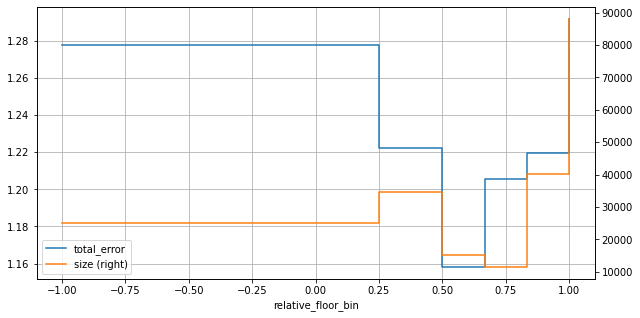

                    total_error   size
relative_floor_bin                    
-1.000000              1.278067  24956
 0.250000              1.222266  34615
 0.500000              1.158394  15305
 0.666667              1.205355  11631
 0.833333              1.219448  40147
 1.000000              1.291692  87913
                    total_error   size
relative_floor_bin                    
-1.000000              1.278067  24956
 0.250000              1.222266  34615
 0.500000              1.158394  15305
 0.666667              1.205355  11631
 0.833333              1.219448  40147
 1.000000              1.291692  87913
-------------- streetPlain_baseRent_size -------------
edges [1.0000e+00 2.0000e+00 5.0000e+00 9.0000e+00 1.9000e+01 4.3000e+01
 1.5300e+02 9.9999e+04]
categories 237905    3
143718    6
53329     6
198945    2
193723    3
         ..
119879    2
259178    0
131932    3
146867    5
121958    0
Name: streetPlain_baseRent_size, Length: 214567, dtype: int64


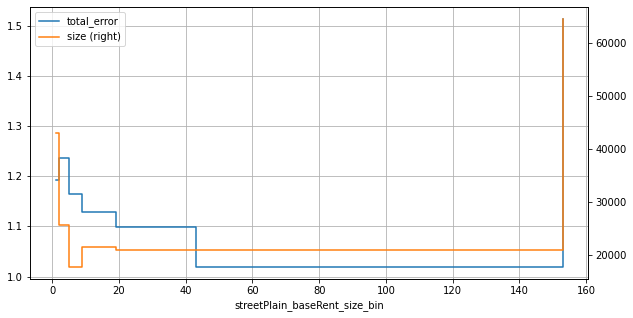

                               total_error   size
streetPlain_baseRent_size_bin                    
1.0                               1.193196  43027
2.0                               1.236099  25744
5.0                               1.165330  17901
9.0                               1.129157  21544
19.0                              1.097689  21046
43.0                              1.019921  20962
153.0                             1.512101  64343
                               total_error   size
streetPlain_baseRent_size_bin                    
1.0                               1.193196  43027
2.0                               1.236099  25744
5.0                               1.165330  17901
9.0                               1.129157  21544
19.0                              1.097689  21046
43.0                              1.019921  20962
153.0                             1.512101  64343
-------------- geo_bln_price_costs_mean -------------
edges [141.108722   143.48181549 149.24193327 

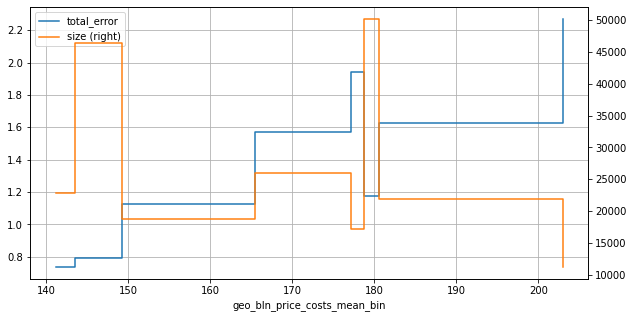

                              total_error   size
geo_bln_price_costs_mean_bin                    
141.108722                       0.739799  22844
143.481815                       0.790020  46418
149.241933                       1.126475  18709
165.432054                       1.570055  26037
177.214701                       1.941548  17210
178.702801                       1.176784  50102
180.627482                       1.625495  21935
203.001990                       2.267247  11312
                              total_error   size
geo_bln_price_costs_mean_bin                    
141.108722                       0.739799  22844
143.481815                       0.790020  46418
149.241933                       1.126475  18709
165.432054                       1.570055  26037
177.214701                       1.941548  17210
178.702801                       1.176784  50102
180.627482                       1.625495  21935
203.001990                       2.267247  11312
-------------- servi

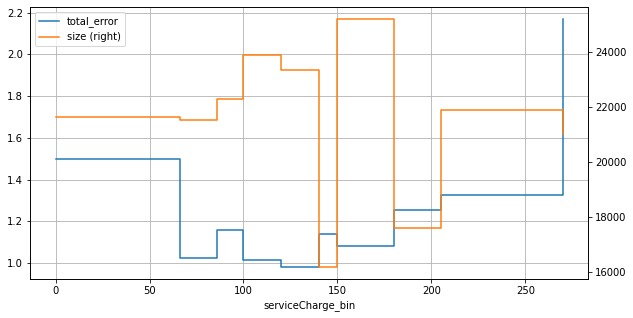

                   total_error   size
serviceCharge_bin                    
0.0                   1.500432  21643
66.0                  1.023294  21521
86.0                  1.159321  22295
100.0                 1.014353  23907
120.0                 0.983299  23352
140.0                 1.137582  16181
150.0                 1.080267  25187
180.0                 1.255535  17577
205.0                 1.326399  21903
270.0                 2.167383  21001
                   total_error   size
serviceCharge_bin                    
0.0                   1.500432  21643
66.0                  1.023294  21521
86.0                  1.159321  22295
100.0                 1.014353  23907
120.0                 0.983299  23352
140.0                 1.137582  16181
150.0                 1.080267  25187
180.0                 1.255535  17577
205.0                 1.326399  21903
270.0                 2.167383  21001
-------------- interiorQual_baseRent_size -------------
edges [ 1600. 51654. 65361. 9999

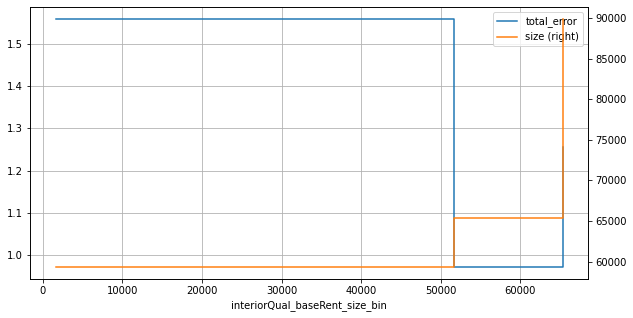

                                total_error   size
interiorQual_baseRent_size_bin                    
1600.0                             1.557609  59383
51654.0                            0.972966  65361
65361.0                            1.255081  89823
                                total_error   size
interiorQual_baseRent_size_bin                    
1600.0                             1.557609  59383
51654.0                            0.972966  65361
65361.0                            1.255081  89823
-------------- interiorQual -------------


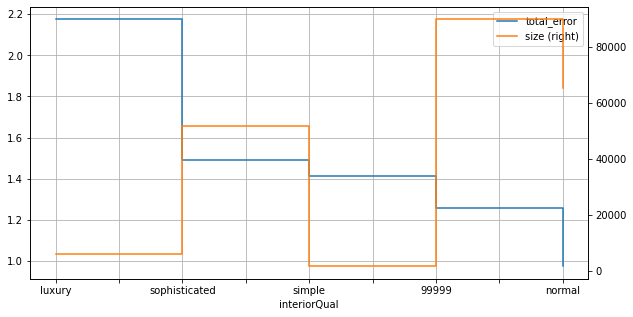

               total_error   size
interiorQual                     
luxury            2.174936   6129
sophisticated     1.489689  51654
simple            1.414746   1600
99999             1.255081  89823
normal            0.972966  65361
               total_error   size
interiorQual                     
luxury            2.174936   6129
sophisticated     1.489689  51654
simple            1.414746   1600
99999             1.255081  89823
normal            0.972966  65361
-------------- telekomTvOffer_baseRent_size -------------
edges [  2918.  99999. 181826.]
categories 237905    1
143718    1
53329     0
198945    0
193723    1
         ..
119879    1
259178    1
131932    0
146867    0
121958    1
Name: telekomTvOffer_baseRent_size, Length: 214567, dtype: int64


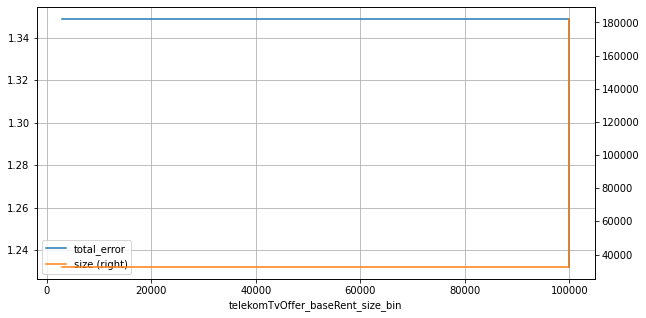

                                  total_error    size
telekomTvOffer_baseRent_size_bin                     
2918.0                               1.348650   32741
99999.0                              1.232216  181826
                                  total_error    size
telekomTvOffer_baseRent_size_bin                     
2918.0                               1.348650   32741
99999.0                              1.232216  181826
-------------- livingSpace -------------
edges [1.0000e+00 4.0950e+01 5.0030e+01 5.7000e+01 6.1850e+01 6.7340e+01
 7.4000e+01 8.1800e+01 9.3000e+01 1.1285e+02 6.6100e+04]
categories 237905    2
143718    9
53329     7
198945    5
193723    0
         ..
119879    4
259178    6
131932    0
146867    8
121958    5
Name: livingSpace, Length: 214567, dtype: int64


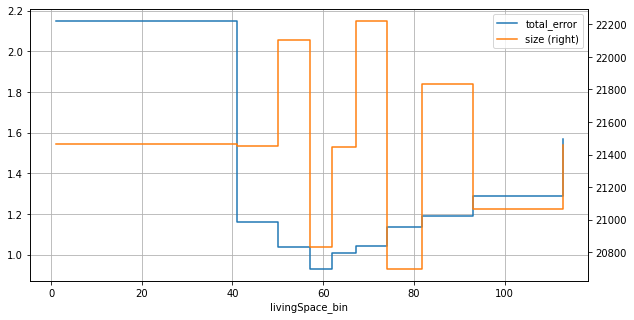

                 total_error   size
livingSpace_bin                    
1.00                2.146545  21463
40.95               1.159230  21455
50.03               1.037432  22103
57.00               0.932398  20830
61.85               1.010906  21445
67.34               1.040885  22218
74.00               1.138363  20699
81.80               1.188893  21834
93.00               1.287815  21064
112.85              1.568254  21456
                 total_error   size
livingSpace_bin                    
1.00                2.146545  21463
40.95               1.159230  21455
50.03               1.037432  22103
57.00               0.932398  20830
61.85               1.010906  21445
67.34               1.040885  22218
74.00               1.138363  20699
81.80               1.188893  21834
93.00               1.287815  21064
112.85              1.568254  21456
-------------- geo_plz_price_costs_mean -------------
edges [    0.           129.51666667   138.72727273   146.49420924
   155.0408    

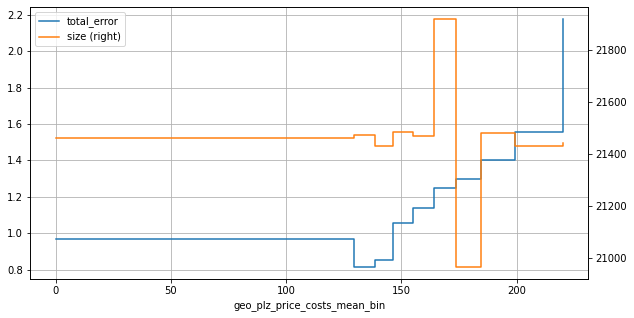

                              total_error   size
geo_plz_price_costs_mean_bin                    
0.000000                         0.969323  21464
129.516667                       0.816442  21474
138.727273                       0.852081  21432
146.494209                       1.053781  21485
155.040800                       1.139371  21471
164.071910                       1.247655  21918
173.558604                       1.296990  20968
184.500000                       1.403312  21481
199.193548                       1.558333  21432
220.000000                       2.174556  21442
                              total_error   size
geo_plz_price_costs_mean_bin                    
0.000000                         0.969323  21464
129.516667                       0.816442  21474
138.727273                       0.852081  21432
146.494209                       1.053781  21485
155.040800                       1.139371  21471
164.071910                       1.247655  21918
173.558604          

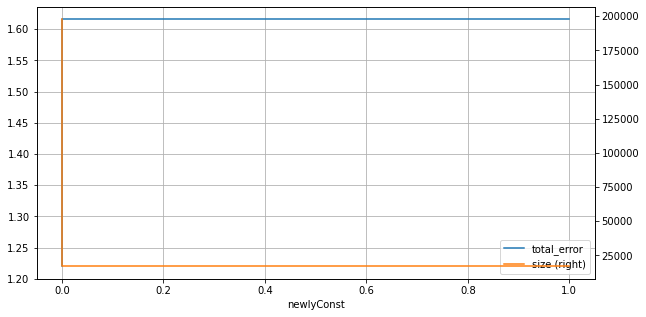

            total_error    size
newlyConst                     
1              1.615871   16854
0              1.219743  197713
            total_error    size
newlyConst                     
1              1.615871   16854
0              1.219743  197713
-------------- typeOfFlat_baseRent_size -------------
edges [   769.   7634.  25127.  27874.  99999. 104805.]
categories 237905    1
143718    4
53329     1
198945    1
193723    1
         ..
119879    1
259178    1
131932    4
146867    4
121958    1
Name: typeOfFlat_baseRent_size, Length: 214567, dtype: int64


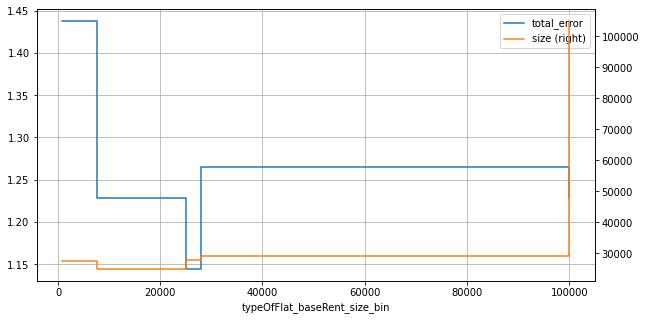

                              total_error    size
typeOfFlat_baseRent_size_bin                     
769.0                            1.437279   27539
7634.0                           1.228048   25127
25127.0                          1.144826   27874
27874.0                          1.265454   29222
99999.0                          1.228728  104805
                              total_error    size
typeOfFlat_baseRent_size_bin                     
769.0                            1.437279   27539
7634.0                           1.228048   25127
25127.0                          1.144826   27874
27874.0                          1.265454   29222
99999.0                          1.228728  104805
-------------- heatingType_baseRent_size -------------
edges [   126.  14130.  15908.  19854.  99999. 102952.]
categories 237905    4
143718    4
53329     1
198945    1
193723    4
         ..
119879    3
259178    0
131932    3
146867    3
121958    4
Name: heatingType_baseRent_size, Length: 21456

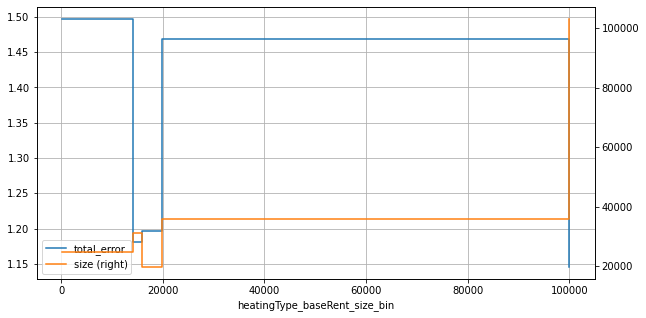

                               total_error    size
heatingType_baseRent_size_bin                     
126.0                             1.496375   24836
14130.0                           1.181277   31209
15908.0                           1.196686   19854
19854.0                           1.468584   35716
99999.0                           1.146145  102952
                               total_error    size
heatingType_baseRent_size_bin                     
126.0                             1.496375   24836
14130.0                           1.181277   31209
15908.0                           1.196686   19854
19854.0                           1.468584   35716
99999.0                           1.146145  102952
-------------- condition_baseRent_size -------------
edges [3.0000e+00 1.3784e+04 1.7496e+04 2.0978e+04 2.1454e+04 5.3184e+04
 9.9999e+04]
categories 237905    5
143718    5
53329     4
198945    2
193723    2
         ..
119879    4
259178    4
131932    4
146867    1
121958    5
Name

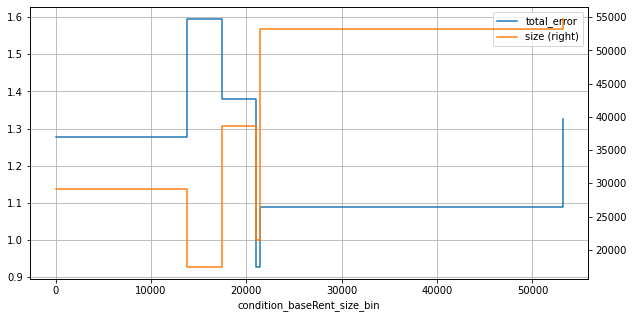

                             total_error   size
condition_baseRent_size_bin                    
3.0                             1.278459  29156
13784.0                         1.593758  17496
17496.0                         1.378838  38623
20978.0                         0.928736  21454
21454.0                         1.088292  53184
53184.0                         1.326176  54654
                             total_error   size
condition_baseRent_size_bin                    
3.0                             1.278459  29156
13784.0                         1.593758  17496
17496.0                         1.378838  38623
20978.0                         0.928736  21454
21454.0                         1.088292  53184
53184.0                         1.326176  54654


In [12]:
features_1_grouped = grouped_variables_baseRent + bool_features + transform2categorical +  continuous_features + telekom_features + year_features + extra_features + size_features
features_2_grouped = grouped_variables_priceCosts + bool_features + transform2categorical +  continuous_features + telekom_features + year_features + extra_features + size_features

data_modelled, samples_error = features_mod_pipeline(data_train = data_train,
                                                        data_train_transformed = data_train_transformed,
                                                        features_1 = features_1_grouped,
                                                        features_2 = features_2_grouped,
                                                        plot_error_features = True, 
                                                        threshold = 10,
                                                        cat_features = True)

It improves, so I will keep this features! Let's see if the combination of both features is better!

In [ ]:
features_1_grouped_categorical = features_0_size + grouped_variables_baseRent
features_2_grouped_categorical = features_0_size + grouped_variables_priceCosts 

data_modelled, samples_error = features_mod_pipeline(data_train = data_train,
                                                        data_train_transformed = data_train_transformed,
                                                        features_1 = features_1_grouped_categorical,
                                                        features_2 = features_2_grouped_categorical,
                                                        plot_error_features = True, 
                                                        threshold = 10,
                                                        cat_features = True)

It improves a little bit, so I will keep both! For Target_2 it does not improve so I will take the other ones!

Let's develop now a model for each target and select the features that are important for each model. The features important to predict the baseRent price might not be the same as the ones used to predict the priceCosts. First I will look at the correlation between the features to see how correlated they are and if it is going to affect our feature selection procedure. If we do feature permutation and 2 features are very correlated, removing one will not suppose a big drop of accuracy and then the algorithm will clasify it as 'non-important' although it might contain a lot of information. If we take this into account we can do a much better feature selection.

## Linear and Non-Linear Correlation between features 

In [ ]:
from feature_clustering.feature_cluster import get_feature_clusters 

In [ ]:
df_corr = data_train_transformed[features_0_size + grouped_variables_baseRent + grouped_variables_priceCosts + [target_1, target_2]].fillna(0)

In [ ]:
q = df_corr.shape[0] / df_corr.shape[1]
clusters_non_linear = get_feature_clusters(X = df_corr,q = q, dependence_metric = 'information_variation',distance_metric = 'squared_angular')

In [ ]:
q = df_corr.shape[0] / df_corr.shape[1]
clusters_linear = get_feature_clusters(X = df_corr,q = q, dependence_metric = 'linear',distance_metric = 'squared_angular') 

Features are not very correlated and almost all bring independent information. I will then not use a feature permutation cluster strategy and I will just account for the fact that some features are correlated. If there were a lot of correlated groups we could make clusters and permutate features in a cluster-wise way so that substitution effects are avoided

In [ ]:
from lightgbm import LGBMRegressor
from feature_selection_utils import feature_permutation, forward_feat_selection, backward_feat_selection

## Feature selection for Target_1: BaseRent per Square Meter

In [ ]:
imp_target_1 = feature_permutation(data_train_transformed = data_train_transformed,
                                  data_train = data_train,
                                  features_evaluate = features_1_grouped_categorical,
                                  target = target_1) 

In [ ]:
features_imp_target_1 = list(imp_target_1.sort_values('mean',ascending = False).index)
model_1 = LGBMRegressor()
sel_no_nan = ~data_train_transformed[target_1].isnull()

features_forward_target_1 = forward_feat_selection(data_train_transformed = data_train_transformed,
                                                    features_imp_target = features_imp_target_1,
                                                    target = target_1,
                                                    model = model_1,
                                                    sel = sel_no_nan,
                                                    cat_feature_list = data_train[features_imp_target_1].select_dtypes("object").columns.tolist())

In [ ]:
features_imp_target_1 = list(imp_target_1.sort_values('mean').index)
model_1 = LGBMRegressor()
sel_no_nan = ~data_train_transformed[target_1].isnull()

features_backward_target_1 = backward_feat_selection(data_train_transformed = data_train_transformed,
                                                    features_imp_target = features_imp_target_1,
                                                    target = target_1,
                                                    model = model_1,
                                                    sel = sel_no_nan,
                                                    cat_feature_list = data_train[features_imp_target_1].select_dtypes("object").columns.tolist()
)

## Feature selection for Target_2: PriceCosts per Square meter

In [ ]:
imp_target_2 = feature_permutation(data_train_transformed = data_train_transformed,
                                  data_train = data_train,
                                  features_evaluate = features_2_grouped,
                                  target = target_2) 

In [ ]:
features_imp_target_2 = list(imp_target_2.sort_values('mean',ascending = False).index)
model_2 = LGBMRegressor()
sel_no_nan = ~data_train_transformed[target_2].isnull()


features_forward_target_2 = forward_feat_selection(data_train_transformed = data_train_transformed,
                                                    features_imp_target = features_imp_target_2,
                                                    target = target_2,
                                                    model = model_2,
                                                    sel = sel_no_nan,
                                                    cat_feature_list = data_train[features_imp_target_2].select_dtypes("object").columns.tolist())

In [ ]:
features_imp_target_2 = list(imp_target_2.sort_values('mean').index)
model_2 = LGBMRegressor()
sel_no_nan = ~data_train_transformed[target_2].isnull()

features_backward_target_2 = backward_feat_selection(data_train_transformed = data_train_transformed,
                                                    features_imp_target = features_imp_target_2,
                                                    target = target_2,
                                                    model = model_2,
                                                    sel = sel_no_nan,
                                                    cat_feature_list = data_train[features_imp_target_2].select_dtypes("object").columns.tolist())

# HyperParameter Tunning and Ensembling

I will perform hyperparameter tunning for Lightbm, XGBoost and Catboost and I will check if the ensemble does better. As an improvement I can use any AutoML framework: AutoSklearn, TPOT, AutoPytorch and see how better they can do

In [ ]:
from hyper_param_sel_utils import optuna_lightbm,optuna_xgboost ,optuna_catboost

#### Target_1 hyperparameter search

In [ ]:
!pip install optuna

In [ ]:
!pip install catboost

In [ ]:
best_features_target_1 = ['telekomTvOffer_baseRent_size', 'telekomHybridUploadSpeed', 'heatingType_baseRent_size', 'relative_floor',
                          'geo_bln_baseRent_mean', 'telekomUploadSpeed', 'floor', 'electricityBasePrice', 'geo_krs_baseRent_size', 'numberOfFloors',
                          'typeOfFlat_baseRent_size', 'floor_lift', 'condition_baseRent_size', 'cellar', 'years_last_refurbish', 'interiorQual_baseRent_size',
                          'petsAllowed', 'geo_bln', 'geo_plz', 'firingTypes', 'energyEfficiencyClass', 'electricityKwhPrice', 'noParkSpaces', 'heatingType',
                          'heatingCosts', 'noRooms', 'typeOfFlat', 'balcony', 'geo_plz_baseRent_size', 'lift', 'streetPlain', 'years_old', 'hasKitchen',
                          'newlyConst', 'interiorQual', 'condition', 'streetPlain_baseRent_size','serviceCharge', 'geo_krs_baseRent_mean', 'streetPlain_baseRent_mean',
                          'geo_krs', 'livingSpace', 'geo_plz_baseRent_mean']

In [ ]:
params_best_lightbm_target_1 = optuna_lightbm(data_train = data_train,
                             data_train_transformed = data_train_transformed,
                             target = target_1,
                             features_optuna = best_features_target_1)

In [ ]:
params_best_xgboost_1 = optuna_xgboost(data_train = data_train,
                             data_train_transformed = data_train_transformed,
                             target = target_1,
                             features_optuna = best_features_target_1)

In [ ]:
params_best_catboost_1 = optuna_catboost(data_train = data_train,
                             data_train_transformed = data_train_transformed,
                             target = target_1,
                             features_optuna = best_features_target_1)

#### Target_2 hyperparameter search

In [ ]:
best_features_target_2 = ['livingSpace', 'serviceCharge', 'heatingCosts', 'streetPlain_price_costs_mean', 'streetPlain_baseRent_size', 'geo_plz_price_costs_mean']

In [ ]:
params_best_lightbm_target_2 = optuna_lightbm(data_train = data_train,
                             data_train_transformed = data_train_transformed,
                             target = target_2,
                             features_optuna = best_features_target_2)

In [ ]:
params_best_xgboost_2 = optuna_xgboost(data_train = data_train,
                             data_train_transformed = data_train_transformed,
                             target = target_2,
                             features_optuna = best_features_target_2)

In [ ]:
params_best_catboost_2 = optuna_catboost(data_train = data_train,
                             data_train_transformed = data_train_transformed,
                             target = target_1,
                             features_optuna = best_features_target_2)

#### Predict in CV

In [ ]:
from modelling_utils import modelling,visualize_samples_error, visualize_errors_features
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
best_features_target_1 = ['telekomTvOffer_baseRent_size', 'telekomHybridUploadSpeed', 'heatingType_baseRent_size', 'relative_floor',
                          'geo_bln_baseRent_mean', 'telekomUploadSpeed', 'floor', 'electricityBasePrice', 'geo_krs_baseRent_size', 'numberOfFloors',
                          'typeOfFlat_baseRent_size', 'floor_lift', 'condition_baseRent_size', 'cellar', 'years_last_refurbish', 'interiorQual_baseRent_size',
                          'petsAllowed', 'geo_bln', 'geo_plz', 'firingTypes', 'energyEfficiencyClass', 'electricityKwhPrice', 'noParkSpaces', 'heatingType',
                          'heatingCosts', 'noRooms', 'typeOfFlat', 'balcony', 'geo_plz_baseRent_size', 'lift', 'streetPlain', 'years_old', 'hasKitchen',
                          'newlyConst', 'interiorQual', 'condition', 'streetPlain_baseRent_size','serviceCharge', 'geo_krs_baseRent_mean', 'streetPlain_baseRent_mean',
                          'geo_krs', 'livingSpace', 'geo_plz_baseRent_mean']
                          
best_features_target_2 = ['livingSpace', 'serviceCharge', 'heatingCosts', 'streetPlain_price_costs_mean', 'streetPlain_baseRent_size', 'geo_plz_price_costs_mean']

In [ ]:
params_best_lightbm_target_1 = {'lambda_l1': 2.9368895960941834e-06, 'lambda_l2': 3.1444726613902352e-06, 'num_leaves': 241, 'feature_fraction': 0.8866108861951018, 'bagging_fraction': 0.9408206441911622, 'bagging_freq': 3, 'min_child_samples': 60}
params_best_lightbm_target_2 = {'lambda_l1': 0.00043921831731800424, 'lambda_l2': 1.373399373789079e-08, 'num_leaves': 244, 'feature_fraction': 0.9167508058058831, 'bagging_fraction': 0.8512811178209864, 'bagging_freq': 5, 'min_child_samples': 70}

In [ ]:
model_1 = LGBMRegressor(**params_best_lightbm_target_1)
model_2 = LGBMRegressor(**params_best_lightbm_target_2)

data_predicted_best = modelling(data_train = data_train,
                        data_train_transformed = data_train_transformed,
                        model_1 = model_1,
                        model_2 = model_2,
                        features_1 = best_features_target_1,
                        features_2 = best_features_target_2,
                        cat_features = True)

print('TOTAL ERROR:',data_predicted_best['total_error'].abs().mean())
print('ERROR_1:',data_predicted_best['error_1'].abs().mean())
print('ERROR_2:',data_predicted_best['error_2'].abs().mean())

### Train model in all data and save for testing (or production)!

In [ ]:
from modelling_utils import save_model, save_model_config

In [ ]:
params_best_lightbm_target_1 = {'lambda_l1': 2.9368895960941834e-06, 'lambda_l2': 3.1444726613902352e-06, 'num_leaves': 241, 'feature_fraction': 0.8866108861951018, 'bagging_fraction': 0.9408206441911622, 'bagging_freq': 3, 'min_child_samples': 60}
params_best_lightbm_target_2 = {'lambda_l1': 0.00043921831731800424, 'lambda_l2': 1.373399373789079e-08, 'num_leaves': 244, 'feature_fraction': 0.9167508058058831, 'bagging_fraction': 0.8512811178209864, 'bagging_freq': 5, 'min_child_samples': 70}

In [ ]:
model_1 = LGBMRegressor(**params_best_lightbm_target_1)
model_2 = LGBMRegressor(**params_best_lightbm_target_2)

sel_no_nan = ~data_train_transformed[target_2].isnull()

model_1.fit(data_train_transformed[best_features_target_1],
            data_train_transformed[target_1])
model_2.fit(data_train_transformed[sel_no_nan][best_features_target_2],
            data_train_transformed[sel_no_nan][target_2])

In [ ]:
save_model(model_1, target_1)
save_model(model_2, target_2)

In [ ]:
model_config_1 = {}
model_config_1["feature_cols"] = best_features_target_1
model_config_1["target"] = target_1
save_model_config(model_config_1, target_1)

model_config_2 = {}
model_config_2["feature_cols"] = best_features_target_2
model_config_2["target"] = target_2
save_model_config(model_config_2, target_2)


# Additional Feature: Confidence in the prediction! And additionally remove houses with too high expected error.

I incorporate the prediction of the two models as a feature. Note that it can be done to predict better the error per Model. I will keep it like this and propose the separate version as an improvement.

In [ ]:
data_predicted_best['prediction_total'] = data_predicted_best['prediction_model_1'] + data_predicted_best['prediction_model_2']
data_predicted_best['prediction_total'] = data_predicted_best['prediction_total'].fillna(99999) 
data_train_transformed['prediction_total'] = data_predicted_best['prediction_total']

In [ ]:
target_error = 'targetError' #What we want to predict now
data_train_transformed[target_error] = data_predicted_best['total_error'].abs()
data_train[target_error] = data_train_transformed[target_error]

Select the features that we want to include as the baseline

In [ ]:
features_0 = location_features + bool_features + transform2categorical +  continuous_features + telekom_features + year_features + extra_features
features_0_size_pred = features_0 + size_features + ['prediction_total']

In [ ]:
from modelling_utils import modelling_error, features_error_mod_pipeline

Cross validate and look at the result

In [ ]:
data_modelled = features_error_mod_pipeline(data_train = data_train,
                                                           data_train_transformed = data_train_transformed,
                                                           features = features_0_size_pred,
                                                           threshold = 2,
                                                           plot_error_features = False)

In [ ]:
sel = data_modelled['Error_of_errors'] > 5
data_modelled[sel][['prediction_error',target_error,'Error_of_errors']]

Select better features

In [ ]:
from lightgbm import LGBMRegressor
from feature_selection_utils import feature_permutation, forward_feat_selection, backward_feat_selection

In [ ]:
imp_target = feature_permutation(data_train_transformed = data_train_transformed,
                                  data_train = data_train,
                                  features_evaluate = features_0_size_pred,
                                  target = target_error) 

In [ ]:
features_imp_target = list(imp_target.sort_values('mean',ascending = False).index)
model = LGBMRegressor()
sel_no_nan = ~data_train_transformed[target_error].isnull()

features_forward_target = forward_feat_selection(data_train_transformed = data_train_transformed,
                                                    features_imp_target = features_imp_target,
                                                    target = target_error,
                                                    model = model,
                                                    sel = sel_no_nan,
                                                    cat_feature_list = data_train[features_imp_target].select_dtypes("object").columns.tolist())

In [ ]:
features_imp_target = list(imp_target.sort_values('mean').index)
model = LGBMRegressor()
sel_no_nan = ~data_train_transformed[target_error].isnull()

features_backward_target = backward_feat_selection(data_train_transformed = data_train_transformed,
                                                    features_imp_target = features_imp_target,
                                                    target = target_error,
                                                    model = model,
                                                    sel = sel_no_nan,
                                                    cat_feature_list = data_train[features_imp_target].select_dtypes("object").columns.tolist())

In [ ]:
from hyper_param_sel_utils import optuna_lightbm

In [ ]:
best_features_target = ['telekomTvOffer', 'telekomTvOffer_baseRent_size', 'garden_baseRent_size', 'floor_lift',
                        'electricityBasePrice', 'telekomHybridUploadSpeed', 'years_last_refurbish', 'garden', 'floor',
                        'heatingType_baseRent_size', 'condition_baseRent_size', 'petsAllowed', 'interiorQual', 'geo_krs_baseRent_size',
                        'electricityKwhPrice', 'telekomUploadSpeed', 'typeOfFlat_baseRent_size', 'interiorQual_baseRent_size', 'lift',
                        'numberOfFloors', 'balcony', 'energyEfficiencyClass', 'noParkSpaces', 'firingTypes', 'typeOfFlat', 'heatingType',
                        'geo_plz', 'cellar', 'heatingCosts', 'geo_plz_baseRent_size', 'geo_bln', 'years_old', 'hasKitchen',
                        'condition', 'newlyConst', 'noRooms', 'streetPlain', 'streetPlain_baseRent_size', 'livingSpace', 'geo_krs',
                        'serviceCharge', 'prediction_total']

In [ ]:
params_best_lightbm_target = optuna_lightbm(data_train = data_train,
                             data_train_transformed = data_train_transformed,
                             target = target_error,
                             features_optuna = best_features_target)

In [ ]:
params_best_lightbm_target = {'lambda_l1': 9.625732238236882, 'lambda_l2': 2.0625363717262825e-06, 'num_leaves': 157, 'feature_fraction': 0.8157531080543283, 'bagging_fraction': 0.9248305116485586, 'bagging_freq': 3, 'min_child_samples': 82}

Lets look at the distribution of the error

In [ ]:
data_modelled, samples_error = features_error_mod_pipeline(data_train = data_train,
                                                           data_train_transformed = data_train_transformed,
                                                           features = best_features_target,
                                                           threshold = 2,
                                                           plot_error_features = True,
                                                           params = params_best_lightbm_target) 

In [ ]:
# 1 is predicted big error

#### Which threshold should I take to avoid houses with big errors and still dont miss a lot of hauses with small real predicted error?


In this case I am assuming that if the predicted error is let's say 8 and the real error is 7 it is wrong. Actually, in this application it could be done that if the predicted error is high and the real error is high it should be count as a hit. Kind of define a threshold from real error where we think it is better not to show a haus and if the predicted error it's higher than another threshold (to be adjusted with the confusion matrix) then it is a hit and we would not show the haus.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

for thres in np.arange(0.5,15,0.5):
  data_modelled[f'prediction_error_threshold_{thres}'] = data_modelled['prediction_error'].apply(lambda x: 1 if x > thres else 0)
  data_modelled[f'real_error_threshold_{thres}'] = data_modelled[target_error].apply(lambda x: 1 if x > thres else 0)

  print('-------',thres,'---------')
  print(f1_score(y_true = data_modelled[f'real_error_threshold_{thres}'],
                 y_pred = data_modelled[f'prediction_error_threshold_{thres}']))
  cm = confusion_matrix(y_true = data_modelled[f'real_error_threshold_{thres}'],
                        y_pred = data_modelled[f'prediction_error_threshold_{thres}'])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

## Save model and config file trained in all examples

In [ ]:
model_error = LGBMRegressor(**params_best_lightbm_target)

sel_no_nan = ~data_train_transformed[target_error].isnull()

model_error.fit(data_train_transformed[sel_no_nan][best_features_target],
            data_train_transformed[sel_no_nan][target_error])

In [ ]:
save_model(model_error, target_error)

model_config_error = {}
model_config_error["feature_cols"] = best_features_target
model_config_error["target"] = target_error
save_model_config(model_config_error, target_error)